In [1]:
import pandas as pd
import glob
import os

# 시트 번호 및 정확한 폴더명 매핑 (띄어쓰기 제거 + 경로 반영)
table_paths = {
    "1.회원정보": "data/train/1.회원정보",
    "2.신용정보": "data/train/2.신용정보",
    "3.승인매출정보": "data/train/3.승인매출정보",
    "4.청구입금정보": "data/train/4.청구입금정보",
    "5.잔액정보": "data/train/5.잔액정보",
    "6.채널정보": "data/train/6.채널정보",
    "7.마케팅정보": "data/train/7.마케팅정보",
    "8.성과정보": "data/train/8.성과정보"
}

# 결과 저장용 딕셔너리
merged_data = {}

# 각 테이블 통합
for name, path in table_paths.items():
    files = glob.glob(os.path.join(path, "*.parquet"))
    if len(files) > 0:
        df = pd.concat([pd.read_parquet(f) for f in sorted(files)], ignore_index=True)
        merged_data[name] = df
        print(f"{name} ✅ 불러오기 완료: {df.shape}")
    else:
        print(f"{name} ⚠️ 파일 없음")

# 예시: 성과정보 테이블 미리 보기
merged_data["8.성과정보"].head()

1.회원정보 ✅ 불러오기 완료: (2400000, 78)
2.신용정보 ✅ 불러오기 완료: (2400000, 42)
3.승인매출정보 ✅ 불러오기 완료: (2400000, 406)
4.청구입금정보 ✅ 불러오기 완료: (2400000, 46)
5.잔액정보 ✅ 불러오기 완료: (2400000, 82)
6.채널정보 ✅ 불러오기 완료: (2400000, 105)
7.마케팅정보 ✅ 불러오기 완료: (2400000, 64)
8.성과정보 ✅ 불러오기 완료: (2400000, 49)


,기준년월,ID,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_신용_전월,...,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M
0,201807,TRAIN_000000,0.454548,0.454548,0.364727,1.999996,0.0,0.0,0.0,0.409766,...,0.999998,1.042805,0.999700,0.999998,0.999998,0.261886,0.270752,0.000000,1.044401,1.280543
1,201807,TRAIN_000001,-0.511808,-0.511808,-0.511808,0.000000,0.0,0.0,0.0,-1.010817,...,1.092698,0.905663,0.999998,0.999998,0.999998,-0.563388,-0.670348,0.000000,0.000000,0.000000
2,201807,TRAIN_000002,-0.062716,-0.062716,0.067843,-1.999996,0.0,0.0,0.0,-0.902166,...,1.006124,1.993590,0.852567,0.999998,0.999998,-0.046516,0.058114,-0.014191,0.524159,1.208420
3,201807,TRAIN_000003,0.135707,0.135707,0.153975,-1.999996,0.0,0.0,0.0,-0.866052,...,0.999998,1.050646,0.999877,0.999998,0.999998,0.023821,0.258943,0.000000,0.880925,1.657124
4,201807,TRAIN_000004,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000028,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN


### 신용정보

In [3]:
# 신용정보 시트를 새로운 변수에 넣는다.
credit_df = merged_data["2.신용정보"]

# 도수분포 확인
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 42 columns):
 #   Column          Dtype  
---  ------          -----  
 0   기준년월            int64  
 1   ID              object 
 2   최초한도금액          int64  
 3   카드이용한도금액        int64  
 4   CA한도금액          int64  
 5   일시상환론한도금액       int64  
 6   월상환론한도금액        int64  
 7   CA이자율_할인전       float64
 8   CL이자율_할인전       float64
 9   RV일시불이자율_할인전    float64
 10  RV현금서비스이자율_할인전  float64
 11  RV신청일자          float64
 12  RV약정청구율         float64
 13  RV최소결제비율        float64
 14  자발한도감액횟수_R12M   object 
 15  자발한도감액금액_R12M   int64  
 16  자발한도감액후경과월      int64  
 17  강제한도감액횟수_R12M   int64  
 18  강제한도감액금액_R12M   int64  
 19  강제한도감액후경과월      int64  
 20  한도증액횟수_R12M     object 
 21  한도증액금액_R12M     int64  
 22  한도증액후경과월        int64  
 23  상향가능한도금액        int64  
 24  상향가능CA한도금액      int64  
 25  카드론동의여부         object 
 26  월상환론상향가능한도금액    int64  
 27  RV전환가능여부        object 
 28  일시불ONLY전환가능여

In [4]:
credit_df

,기준년월,ID,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,...,연체감액여부_R3M,한도심사요청건수,한도요청거절건수,한도심사요청후경과월,한도심사거절후경과월,시장단기연체여부_R6M,시장단기연체여부_R3M,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일
0,201807,TRAIN_000000,0,19354,7270,0,0,22.995207,18.254978,17.264967,...,0,0회,0,3,3,0,0,0,0,99999999
1,201807,TRAIN_000001,0,9996,5718,41996,90611,14.793821,14.834873,10.622446,...,0,0회,0,3,3,0,0,0,0,322
2,201807,TRAIN_000002,0,88193,35207,0,0,22.014276,17.875321,17.155829,...,0,0회,0,3,3,0,0,0,0,2378
3,201807,TRAIN_000003,0,19062,6531,0,0,22.998014,22.999453,19.293674,...,0,0회,0,3,3,0,0,0,0,99999999
4,201807,TRAIN_000004,0,177222,47149,48000,155020,14.661948,10.897410,10.654587,...,0,0회,0,3,3,0,0,0,0,99999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,20070,10167,0,54445,15.243670,11.900516,10.545876,...,0,0회,0,3,3,0,0,0,0,99999999
2399996,201812,TRAIN_399996,0,84217,31159,0,156800,14.843464,15.652063,11.102726,...,0,0회,0,3,3,0,0,0,0,99999999
2399997,201812,TRAIN_399997,0,52612,19429,0,0,17.038599,17.966213,13.278475,...,0,0회,0,3,3,0,0,0,0,99999999
2399998,201812,TRAIN_399998,0,10002,4228,90004,180906,15.182880,11.901089,10.594124,...,0,0회,0,3,3,0,0,0,0,99999999


In [5]:
# 결측치 확인
credit_df.isna().sum()

기준년월                    0
ID                      0
최초한도금액                  0
카드이용한도금액                0
CA한도금액                  0
일시상환론한도금액               0
월상환론한도금액                0
CA이자율_할인전               0
CL이자율_할인전               0
RV일시불이자율_할인전            0
RV현금서비스이자율_할인전          0
RV신청일자            1951236
RV약정청구율                 0
RV최소결제비율                0
자발한도감액횟수_R12M           0
자발한도감액금액_R12M           0
자발한도감액후경과월              0
강제한도감액횟수_R12M           0
강제한도감액금액_R12M           0
강제한도감액후경과월              0
한도증액횟수_R12M             0
한도증액금액_R12M             0
한도증액후경과월                0
상향가능한도금액                0
상향가능CA한도금액              0
카드론동의여부                 0
월상환론상향가능한도금액            0
RV전환가능여부            29473
일시불ONLY전환가능여부           0
카드이용한도금액_B1M            0
카드이용한도금액_B2M            0
특별한도보유여부_R3M            0
연체감액여부_R3M              0
한도심사요청건수                0
한도요청거절건수                0
한도심사요청후경과월              0
한도심사거절후경과월              0
시장단기연체여부_R6M            0
시장단기연체여부_R3M

In [6]:
# 결측치 시각화를 위한 라이브러리
import missingno

# 그래프 기본 import
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

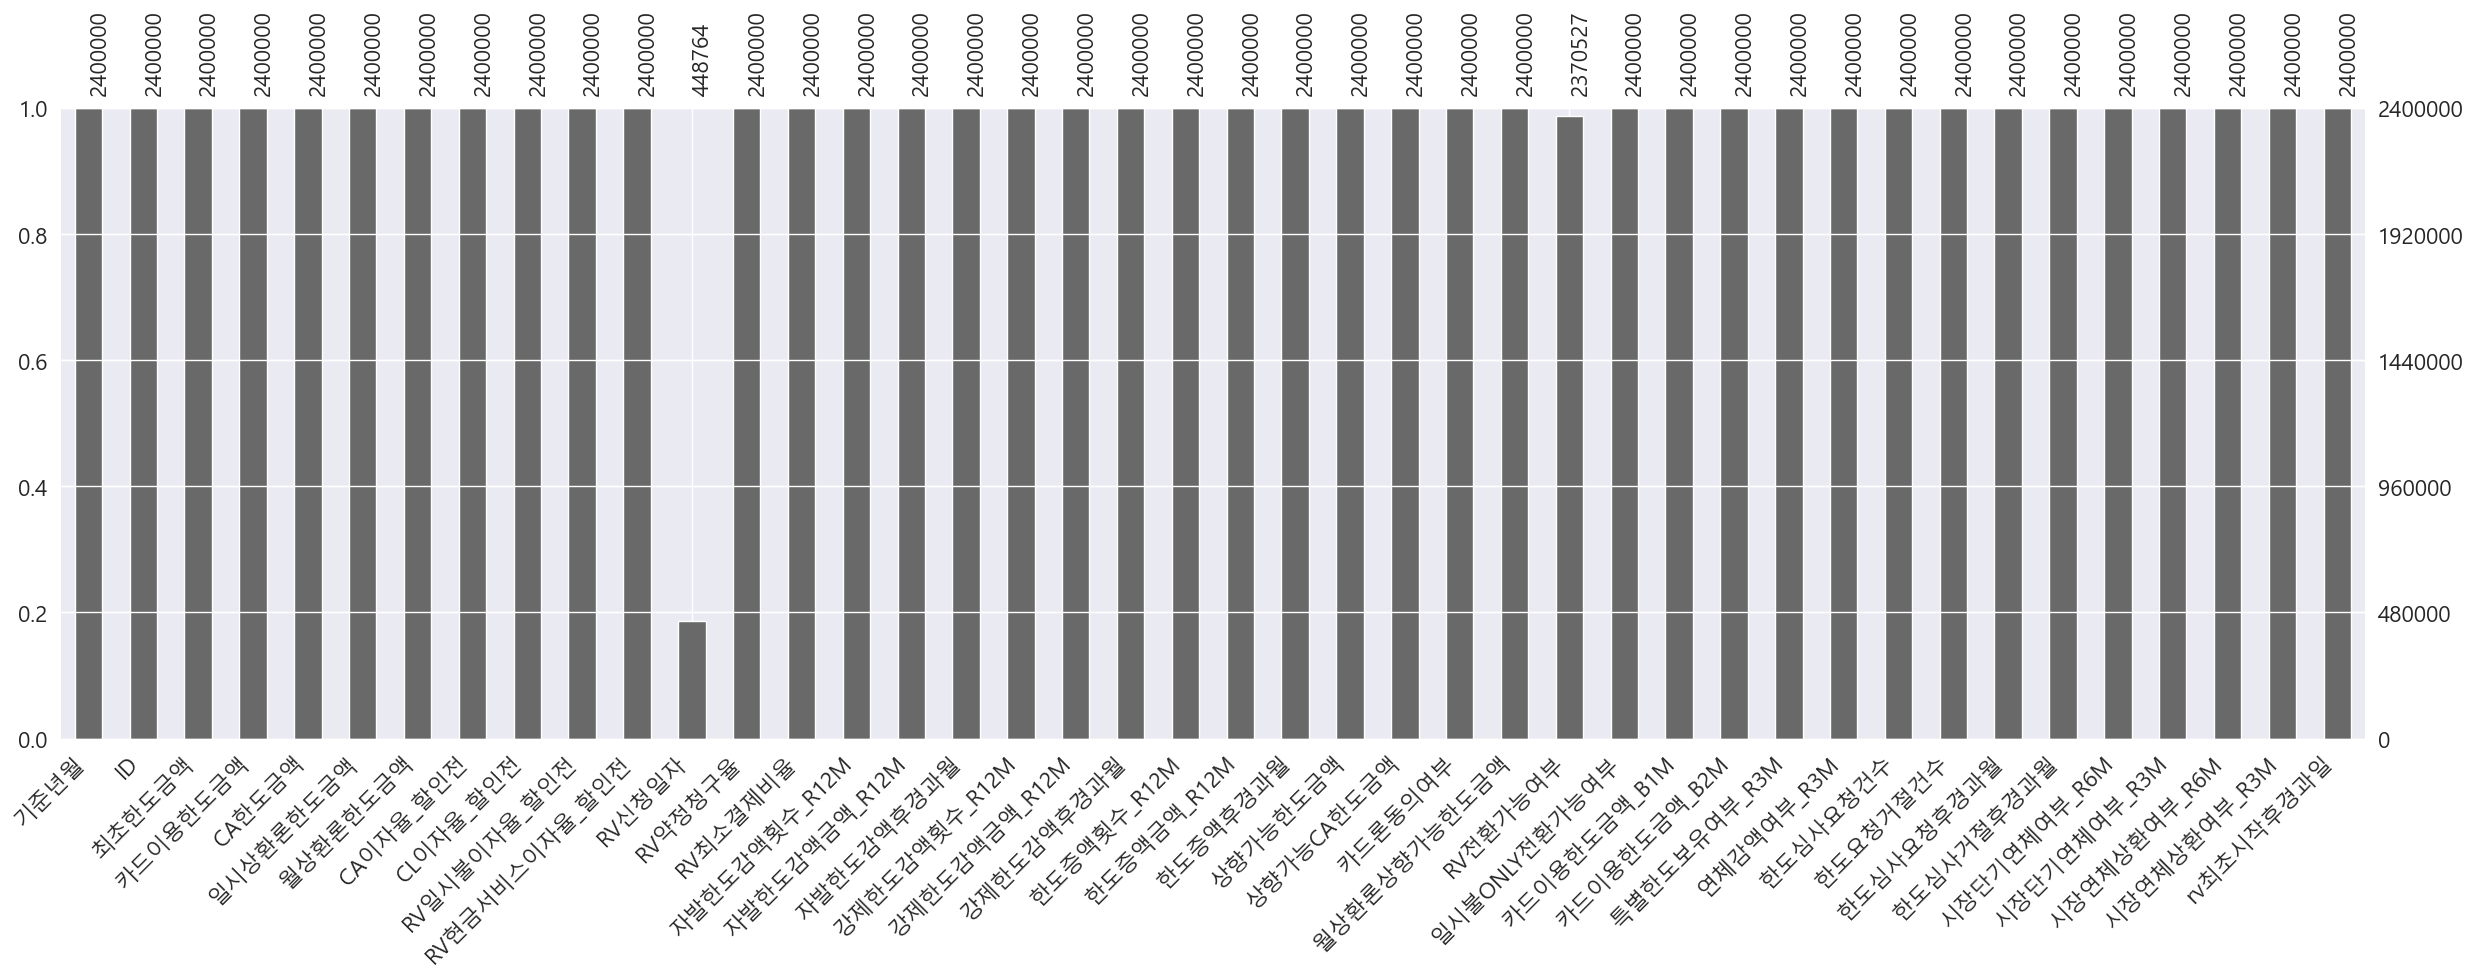

In [7]:
# 신용 정보 내부에 결측치 현황을 그려 분석한다.
missingno.bar(credit_df)
plt.xticks(rotation=90)  # x축 라벨 세로로 세우기
plt.tight_layout()
plt.show()

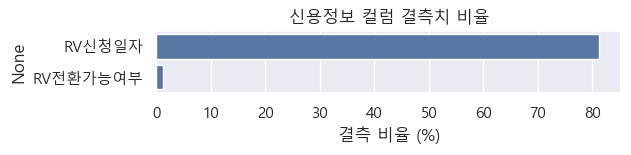

In [8]:
# 결측치 비율 계산
missing_ratio = credit_df.isnull().mean() * 100
missing_ratio = missing_ratio[missing_ratio > 0]  # 결측치가 있는 컬럼만

# 세로 막대그래프
plt.figure(figsize=(6, len(missing_ratio) * 0.4))  # 컬럼 수에 따라 높이 조절
sns.barplot(x=missing_ratio.values, y=missing_ratio.index, orient='h')
plt.xlabel("결측 비율 (%)")
plt.title("신용정보 컬럼 결측치 비율")
plt.tight_layout()
plt.show()


In [9]:
# 결측치 비율 상위 10개
missing_ratio = credit_df.isnull().mean().sort_values(ascending=False)
missing_ratio[missing_ratio > 0].head(10)

RV신청일자      0.813015
RV전환가능여부    0.012280
dtype: float64

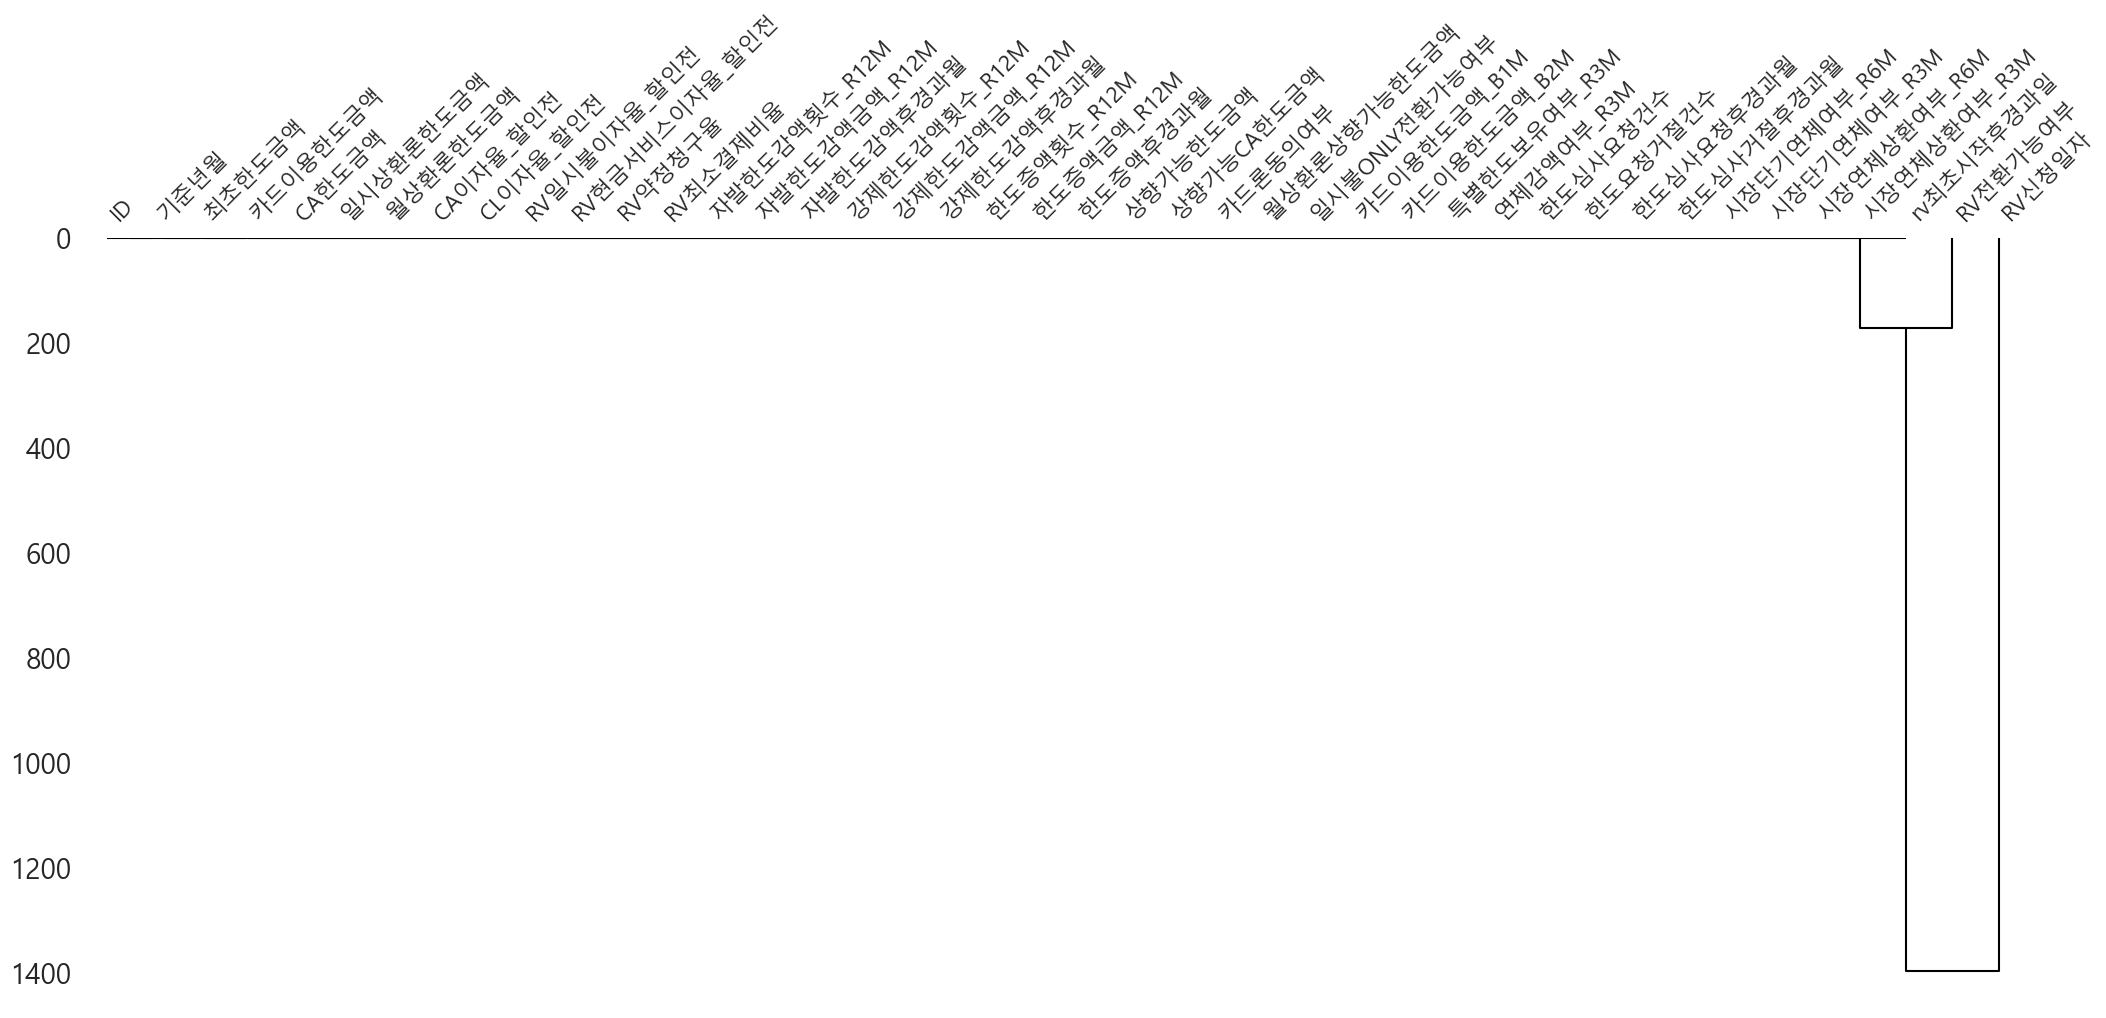

In [10]:
# 결측치 간의 유사성 파악
missingno.dendrogram(credit_df)
plt.show()

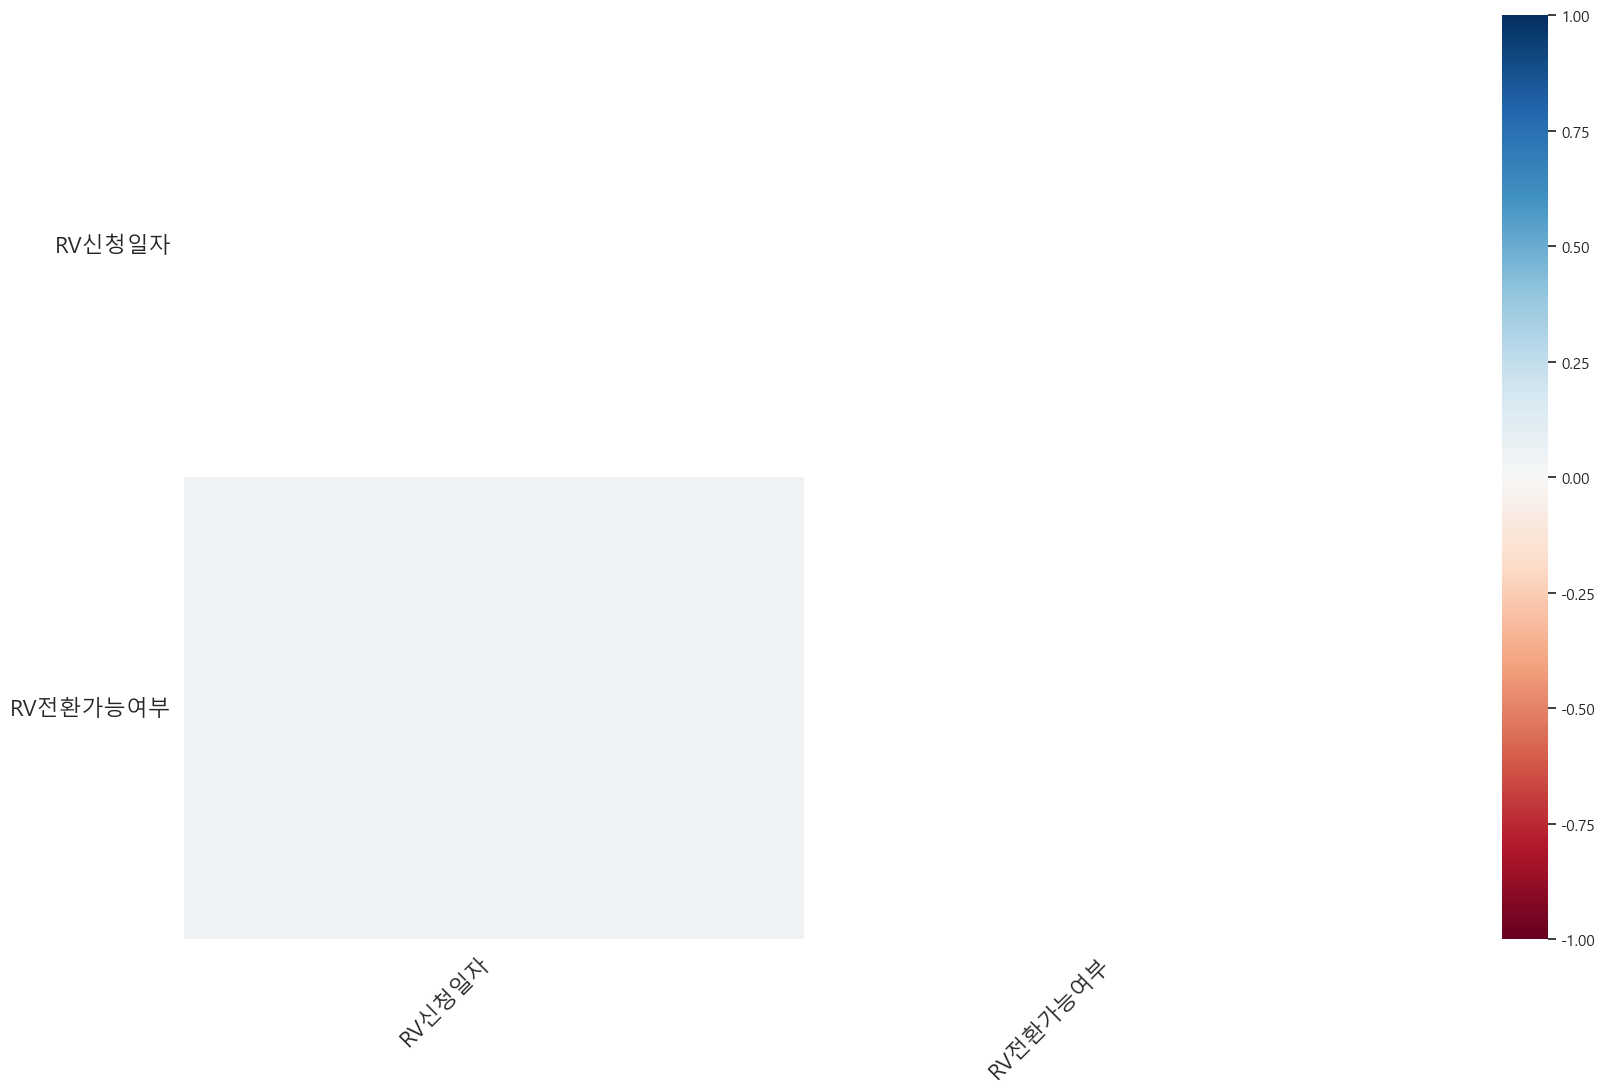

In [11]:
# 결측치 간의 상관관계, 히트맵
missingno.heatmap(credit_df)
plt.show()

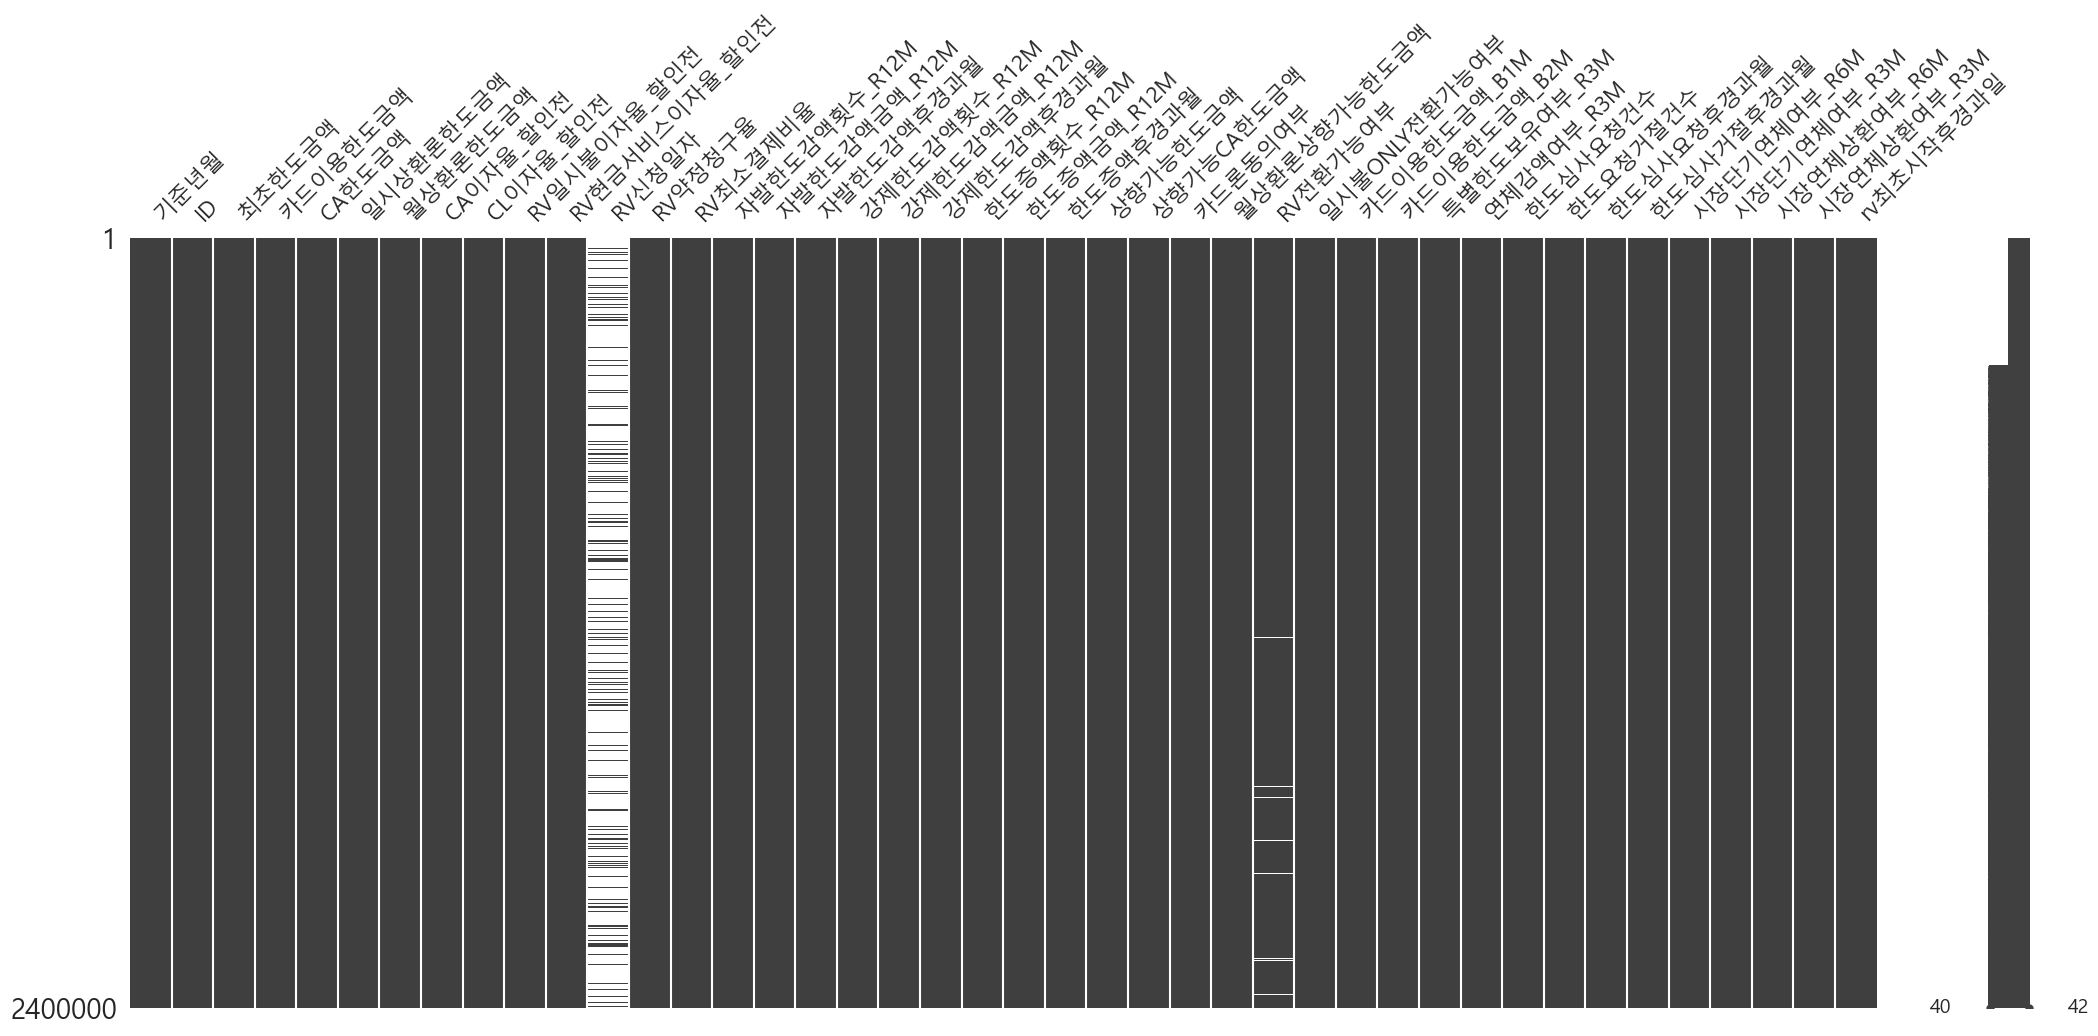

In [12]:
# 각 행별로 결측치가 어느 행에 있는지를 시각화한다.
# 결측치 빈도를 눈으로 확인해볼 수 있다.
missingno.matrix(credit_df)
plt.show()

### 세그먼트 불러오기

In [14]:
# 새로운 변수에 지정해서 만들어준다.
member_df = merged_data["1.회원정보"]

print("📋 데이터프레임별 ID 수 비교")
print(f"1.회원정보 (member_df) 전체 행 수: {len(member_df)}")
print(f"1.회원정보 고유 ID 수: {member_df['ID'].nunique()}")

print(f"2.신용정보 (credit_df) 전체 행 수: {len(credit_df)}")
print(f"2.신용정보 고유 ID 수: {credit_df['ID'].nunique()}")

📋 데이터프레임별 ID 수 비교
1.회원정보 (member_df) 전체 행 수: 2400000
1.회원정보 고유 ID 수: 400000
2.신용정보 (credit_df) 전체 행 수: 2400000
2.신용정보 고유 ID 수: 400000


In [15]:
# member_df에는 있지만 credit_df에는 없는 ID
only_in_member = set(member_df['ID']) - set(credit_df['ID'])
print(f"member_df에는 있고, credit_df에는 없는 ID 수: {len(only_in_member)}")

# credit_df에는 있지만 member_df에는 없는 ID
only_in_credit = set(credit_df['ID']) - set(member_df['ID'])
print(f"credit_df에는 있고, member_df에는 없는 ID 수: {len(only_in_credit)}")

member_df에는 있고, credit_df에는 없는 ID 수: 0
credit_df에는 있고, member_df에는 없는 ID 수: 0


In [16]:
# 중복 확인
print(member_df['ID'].duplicated().sum())  # 중복된 ID 개수

# 중복 제거 (ID 기준으로 가장 첫 번째 행만 유지)
segment_df = member_df[['ID', 'Segment']].drop_duplicates(subset='ID')

2000000


In [17]:
# 1. 필요한 컬럼만 추출 (ID, Segment)
segment_df = member_df[['ID', 'Segment']].drop_duplicates(subset='ID')

# 2. ID 기준으로 credit_df에 병합
credit_df_with_segment = pd.merge(credit_df, segment_df, on='ID', how='left')

# 3. 결과 확인
print(f"병합 후 행 수: {len(credit_df_with_segment)}")
print(f"Segment 컬럼 결측치 수: {credit_df_with_segment['Segment'].isnull().sum()}")

병합 후 행 수: 2400000
Segment 컬럼 결측치 수: 0


In [18]:
credit_df_with_segment

,기준년월,ID,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,...,한도심사요청건수,한도요청거절건수,한도심사요청후경과월,한도심사거절후경과월,시장단기연체여부_R6M,시장단기연체여부_R3M,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일,Segment
0,201807,TRAIN_000000,0,19354,7270,0,0,22.995207,18.254978,17.264967,...,0회,0,3,3,0,0,0,0,99999999,D
1,201807,TRAIN_000001,0,9996,5718,41996,90611,14.793821,14.834873,10.622446,...,0회,0,3,3,0,0,0,0,322,E
2,201807,TRAIN_000002,0,88193,35207,0,0,22.014276,17.875321,17.155829,...,0회,0,3,3,0,0,0,0,2378,C
3,201807,TRAIN_000003,0,19062,6531,0,0,22.998014,22.999453,19.293674,...,0회,0,3,3,0,0,0,0,99999999,D
4,201807,TRAIN_000004,0,177222,47149,48000,155020,14.661948,10.897410,10.654587,...,0회,0,3,3,0,0,0,0,99999999,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,20070,10167,0,54445,15.243670,11.900516,10.545876,...,0회,0,3,3,0,0,0,0,99999999,E
2399996,201812,TRAIN_399996,0,84217,31159,0,156800,14.843464,15.652063,11.102726,...,0회,0,3,3,0,0,0,0,99999999,D
2399997,201812,TRAIN_399997,0,52612,19429,0,0,17.038599,17.966213,13.278475,...,0회,0,3,3,0,0,0,0,99999999,C
2399998,201812,TRAIN_399998,0,10002,4228,90004,180906,15.182880,11.901089,10.594124,...,0회,0,3,3,0,0,0,0,99999999,E


### 범주형 컬럼들의 EDA

In [20]:
# 범주형 컬럼들만 확인할 수 있는 코드
cat_cols = credit_df.select_dtypes(include='object').columns.tolist()

# 컬럼 목록 출력
print("범주형 컬럼 목록")
for col in cat_cols :
    print(f" - {col}")

범주형 컬럼 목록
 - ID
 - 자발한도감액횟수_R12M
 - 한도증액횟수_R12M
 - 카드론동의여부
 - RV전환가능여부
 - 한도심사요청건수


In [21]:
# 범주형 컬럼들의 총 개수
print(f"\n 총 범주형 컬럼 수 : {len(cat_cols)}개")


 총 범주형 컬럼 수 : 6개


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_categorical_distributions(df, max_unique=30, top_n=10, max_plots=5):
    """
    범주형 변수들의 도수 분포 시각화를 수행하는 함수
    - df: DataFrame
    - max_unique: 범주 개수가 이 수보다 작거나 같은 컬럼만 시각화 대상으로 포함
    - top_n: 각 변수별로 상위 n개 범주만 시각화
    - max_plots: 시각화할 변수 개수 제한 (너무 많으면 속도 저하됨)
    """
    # 범주형 컬럼 추출 (object, category형만)
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    # 결과 저장용 딕셔너리
    cat_summary = {}

    # 시각화 진행
    plot_count = 0
    for col in cat_cols:
        unique_vals = df[col].nunique(dropna=False)

        # 고유값 수가 너무 많으면 시각화 생략
        if unique_vals > max_unique:
            continue

        # 도수분포 저장
        value_counts = df[col].value_counts(dropna=False)
        cat_summary[col] = value_counts

        # 시각화 (상위 top_n개만)
        plt.figure(figsize=(8, 4))
        top_n_order = value_counts.index[:top_n]
        sns.countplot(data=df, x=col, order=top_n_order)
        plt.title(f"[{col}] 도수 분포 (Top {top_n})")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        plot_count += 1
        if plot_count >= max_plots:
            print(f"⚠️ 최대 {max_plots}개의 변수만 시각화함. 나머지는 생략됨.")
            break

    # 요약표 반환
    summary_df = pd.concat(
        [cat_summary[col].head(top_n).rename(col) for col in cat_summary],
        axis=1
    ).fillna(0)

    return summary_df

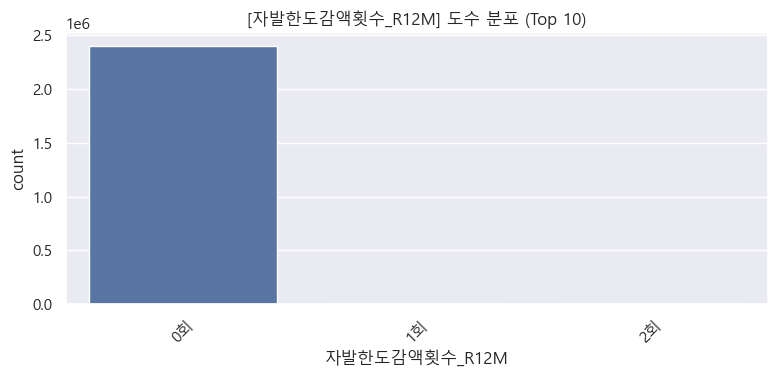

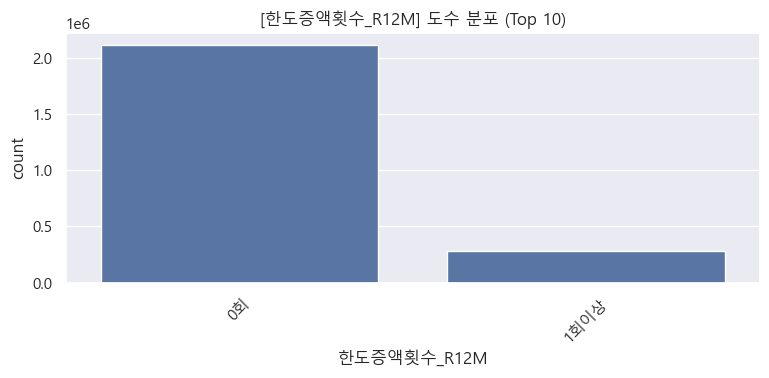

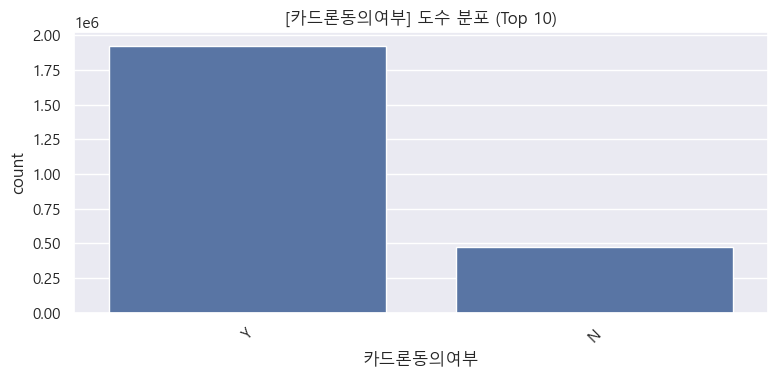

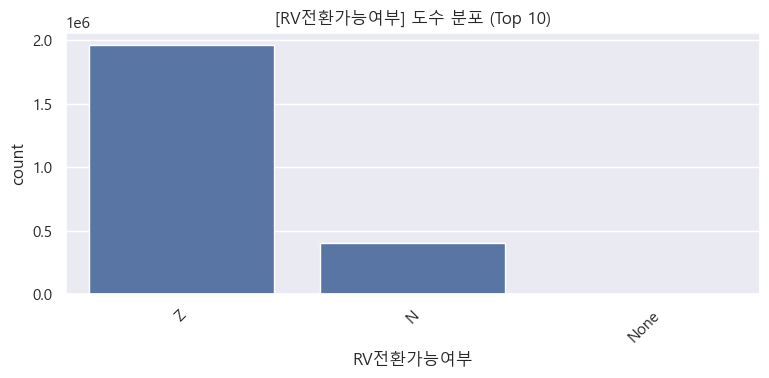

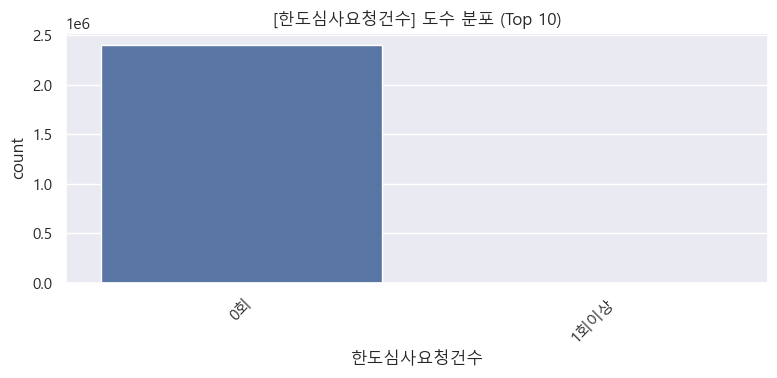

⚠️ 최대 5개의 변수만 시각화함. 나머지는 생략됨.


In [23]:
summary_df = plot_categorical_distributions(credit_df)

In [24]:
# 도수분포 확인할 컬럼 목록 (콤마 꼭 추가!)
target_cols = [
    "자발한도감액횟수_R12M",
    "한도증액횟수_R12M", 
    "카드론동의여부",
    "RV전환가능여부",
    "한도심사요청건수"
]

# 도수분포 수치 출력
for col in target_cols:
    print(f"\n📊 [ {col} ] 도수 분포")
    print(credit_df[col].value_counts(dropna=False))


📊 [ 자발한도감액횟수_R12M ] 도수 분포
자발한도감액횟수_R12M
0회    2397778
1회       2216
2회          6
Name: count, dtype: int64

📊 [ 한도증액횟수_R12M ] 도수 분포
한도증액횟수_R12M
0회      2116131
1회이상     283869
Name: count, dtype: int64

📊 [ 카드론동의여부 ] 도수 분포
카드론동의여부
Y    1925770
N     474230
Name: count, dtype: int64

📊 [ RV전환가능여부 ] 도수 분포
RV전환가능여부
Z       1964098
N        406429
None      29473
Name: count, dtype: int64

📊 [ 한도심사요청건수 ] 도수 분포
한도심사요청건수
0회      2399913
1회이상         87
Name: count, dtype: int64


### 위의 범주형 컬럼과 세그먼트와의 관계

In [26]:
for col in target_cols:
    print(f"\n📊 [ {col} vs Segment ] 교차표")
    cross_tab = pd.crosstab(credit_df_with_segment[col], credit_df_with_segment['Segment'], margins=True)
    print(cross_tab)


📊 [ 자발한도감액횟수_R12M vs Segment ] 교차표
Segment          A    B       C       D        E      All
자발한도감액횟수_R12M                                            
0회             972  144  127390  348849  1920423  2397778
1회               0    0     198     391     1627     2216
2회               0    0       2       2        2        6
All            972  144  127590  349242  1922052  2400000

📊 [ 한도증액횟수_R12M vs Segment ] 교차표
Segment        A    B       C       D        E      All
한도증액횟수_R12M                                            
0회           797  116  108345  290700  1716173  2116131
1회이상         175   28   19245   58542   205879   283869
All          972  144  127590  349242  1922052  2400000

📊 [ 카드론동의여부 vs Segment ] 교차표
Segment    A    B       C       D        E      All
카드론동의여부                                            
N        158   10   17808   64927   391327   474230
Y        814  134  109782  284315  1530725  1925770
All      972  144  127590  349242  1922052  2400000

📊 [ RV전환가능여

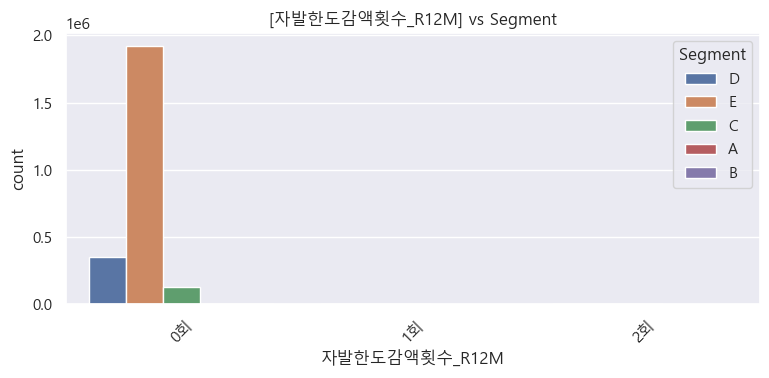

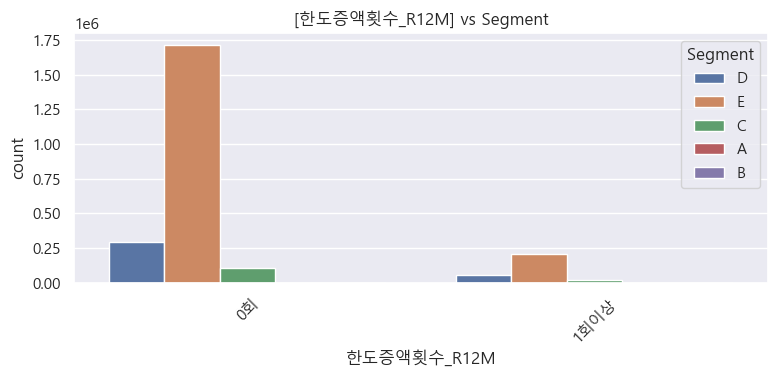

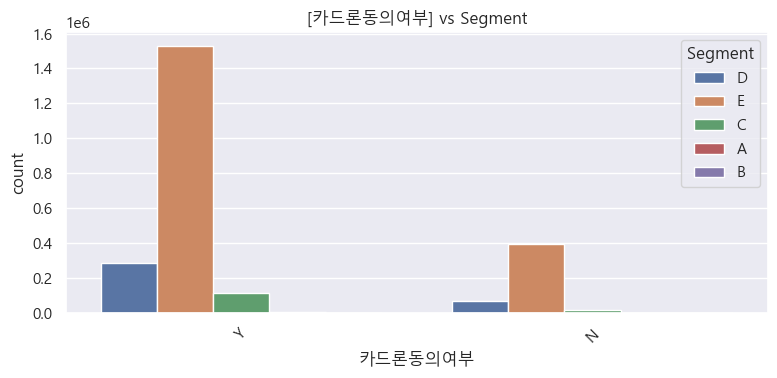

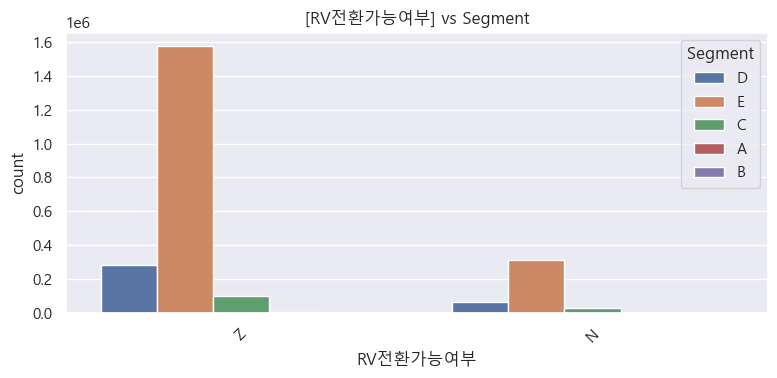

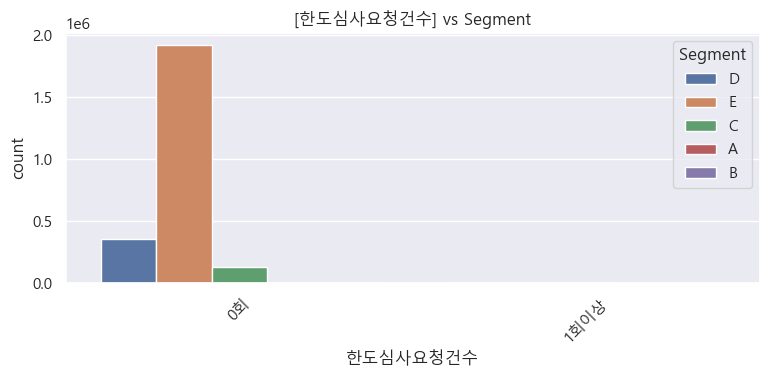

In [27]:
# 범주형 컬럼과 세그먼트와의 관계
# 비교할 범주형 변수 목록 (예시)
target_cols = [
    "자발한도감액횟수_R12M", "한도증액횟수_R12M", "카드론동의여부", "RV전환가능여부", "한도심사요청건수"
]

# 각 변수에 대해 세그먼트별 도수분포 시각화
for col in target_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=credit_df_with_segment, x=col, hue="Segment", order=credit_df_with_segment[col].value_counts().index)
    plt.title(f"[{col}] vs Segment")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 범주형 컬럼 간단 요약(명세서)

[자발한도감액횟수_R12M]
- 전체 고객 중 99% 이상이 "0회"이며,
- "1회" 및 "2회"는 극소수에 해당함.
- 세그먼트 E 그룹에서의 '0회' 빈도가 가장 높게 나타남.
- '1회', '2회'는 모든 세그먼트에서 매우 드물게 발생하여
- 분석 및 시각적 해석에는 제한적임.
- 향후 모델링 또는 의사결정 시 해당 변수는 "0회 여부"로만 이진화하여 사용할 수도 있음.


[한도증액횟수_R12M]
- 전체 고객 중 **약 88%**가 ‘0회’, **약 12%**가 ‘1회 이상’ 증액 이력을 가짐.
- 세그먼트 E가 ‘0회’와 ‘1회 이상’ 모두에서 가장 높은 비중을 차지함.
- 세그먼트 C와 D의 경우 ‘1회 이상’ 비율이 상대적으로 높게 나타남.
→ 실무적 해석: 증액 이력은 세그먼트에 따라 비율 차이가 있으며, 일부 세그먼트에서 보다 활발한 신용 한도 조정 가능성이 있음.

[카드론동의여부]
- 전체 고객 중 약 80.2%가 ‘Y’, 19.8%가 ‘N’ (카드론 동의)
- 세그먼트 E와 D에서 ‘Y’ 응답 비율이 매우 높음, 세그먼트 C에서도 높은 수준.
- 세그먼트 A, B는 전체 고객 수가 적지만 ‘N’ 비중이 높음.
→ 실무적 해석: 세그먼트별로 리스크 성향이 반영될 수 있는 변수이며, 'N' 응답은 보수적 특성을 나타냄


[RV전환가능여부]
- 전체 중 약 82.8%가 ‘Z’, 17.1%가 ‘N’, ‘None’은 극소수.
- ‘Z’는 전환 가능, ‘N’은 불가능, ‘None’은 결측 혹은 미정 상태로 해석 가능.
- 세그먼트 E, D, C 순으로 ‘Z’ 응답 많으며, ‘N’은 E와 D에 집중.
→ 실무적 해석: 대다수가 전환 가능 상태에 있으나, 일부 세그먼트에서 제한적으로 나타남. ‘None’은 전처리 시 별도 처리 필요.


[한도심사요청건수]
- 전체의 99.996%가 ‘0회’, 1회 이상은 87건에 불과함 (극소수)
- ‘1회 이상’은 세그먼트 E와 D에서만 일부 존재함.
→ 실무적 해석: 모델 변수로 활용 시 0/1 이진화 필요. 일반적인 행동이 아닌 특수 케이스로 간주 가능.

## ✅ 범주형 변수 제거 판단 근거

### 📌 분석한 범주형 변수 목록
- 자발한도감액횟수_R12M
- 한도증액횟수_R12M
- 카드론동의여부
- RV전환가능여부
- 한도심사요청건수

### 📊 교차표 분석 결과 요약

| 변수 | 특정값 쏠림 여부 | Segment 간 차이 | 특이사항 |
|------|----------------|----------------|----------|
| 자발한도감액횟수_R12M | **0회에 과도하게 쏠림** | 의미 있는 구분 어려움 | 1~2회는 수치 거의 없음 |
| 한도증액횟수_R12M | 대부분 0회 | 1회 이상도 E 중심 | 분포 차이 미미 |
| 카드론동의여부 | 전체 고객의 약 80% 이상이 Y | Segment E가 압도적 | 분포 균형 부족 |
| RV전환가능여부 | Z와 N으로 나뉘지만 E가 다수 | 의미 있는 분포 차이 없음 | 결측 포함 |
| 한도심사요청건수 | 거의 전부 0회 | 1회 이상 비율 극히 낮음 | 예외적인 값 존재 |

### 🧾 제거 판단 요약
- 모든 변수에서 **대부분의 고객이 특정 값에 집중**되어 있음
- Segment 간 **의미 있는 분포 차이 부족**
- A, B 세그먼트는 **표본 수가 적고 시각적으로도 거의 확인 불가**
- 따라서, **분석 및 모델링에 기여도가 낮고**, 오히려 **과적합의 위험만 높일 수 있음**

> ✅ 결론: 해당 범주형 변수들은 모두 **삭제해도 무방**


### 수치형 컬럼

In [31]:
# 수치형 컬럼 추출
nom_cols = credit_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 컬럼 목록 출력
print("수치형 컬럼 목록")
for col in nom_cols:
    print(f" - {col}")

수치형 컬럼 목록
 - 기준년월
 - 최초한도금액
 - 카드이용한도금액
 - CA한도금액
 - 일시상환론한도금액
 - 월상환론한도금액
 - CA이자율_할인전
 - CL이자율_할인전
 - RV일시불이자율_할인전
 - RV현금서비스이자율_할인전
 - RV신청일자
 - RV약정청구율
 - RV최소결제비율
 - 자발한도감액금액_R12M
 - 자발한도감액후경과월
 - 강제한도감액횟수_R12M
 - 강제한도감액금액_R12M
 - 강제한도감액후경과월
 - 한도증액금액_R12M
 - 한도증액후경과월
 - 상향가능한도금액
 - 상향가능CA한도금액
 - 월상환론상향가능한도금액
 - 일시불ONLY전환가능여부
 - 카드이용한도금액_B1M
 - 카드이용한도금액_B2M
 - 특별한도보유여부_R3M
 - 연체감액여부_R3M
 - 한도요청거절건수
 - 한도심사요청후경과월
 - 한도심사거절후경과월
 - 시장단기연체여부_R6M
 - 시장단기연체여부_R3M
 - 시장연체상환여부_R6M
 - 시장연체상환여부_R3M
 - rv최초시작후경과일


In [32]:
# 범주형 컬럼들의 총 개수
print(f"\n 총 범주형 컬럼 수 : {len(nom_cols)}개")


 총 범주형 컬럼 수 : 36개


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numeric_distributions(df, columns=None, show_box=True, max_plots=5):
    """
    수치형 변수들의 분포를 시각화 (히스토그램 + 옵션: 박스플롯)
    - df: DataFrame
    - columns: 수치형 컬럼 리스트 (없으면 자동 추출)
    - show_box: 박스플롯 함께 표시할지 여부
    - max_plots: 시각화할 변수 개수 제한
    """
    # 수치형 변수 자동 추출
    if columns is None:
        columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # 시각화 진행
    for i, col in enumerate(columns):
        if i >= max_plots:
            print(f"⚠️ 최대 {max_plots}개까지만 시각화합니다.")
            break

        fig, axs = plt.subplots(1, 2 if show_box else 1, figsize=(12, 4))

        # 히스토그램
        sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axs[0] if show_box else axs)
        axs[0 if show_box else 0].set_title(f"[{col}] 분포 (Histogram)")

        # 박스플롯 (선택)
        if show_box:
            sns.boxplot(x=df[col], ax=axs[1])
            axs[1].set_title(f"[{col}] 분포 (Boxplot)")

        plt.tight_layout()
        plt.show()

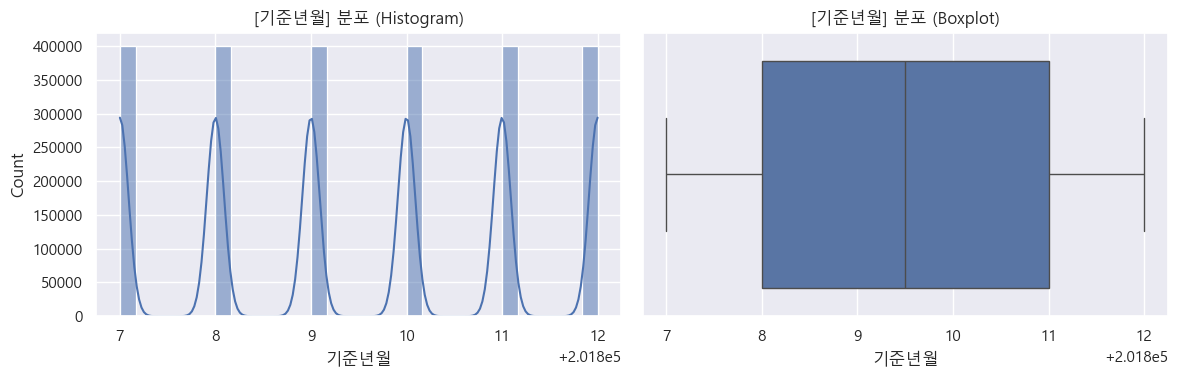

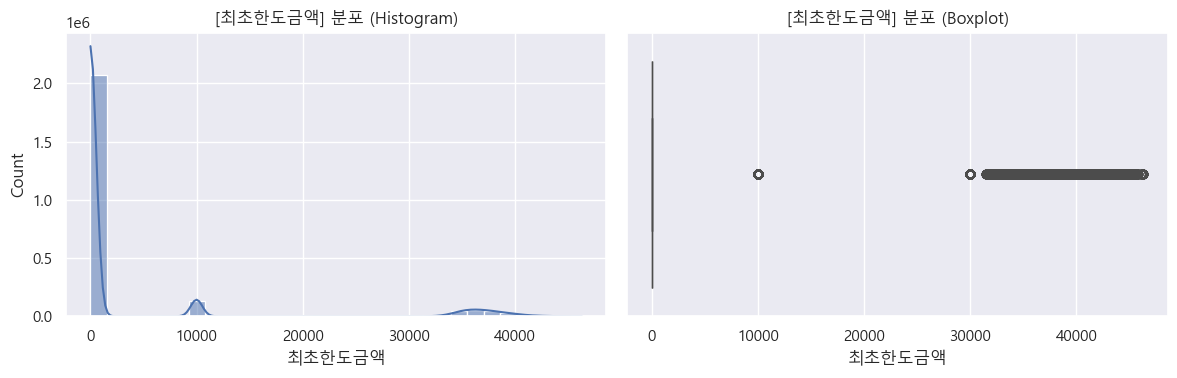

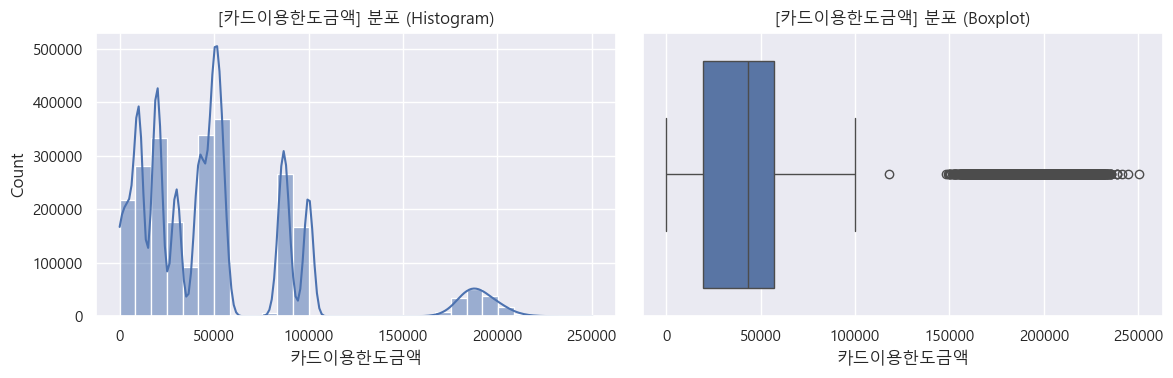

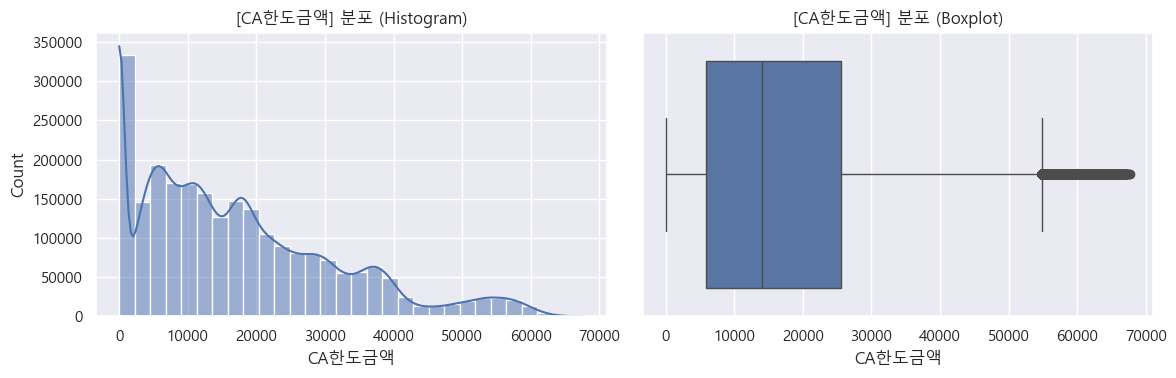

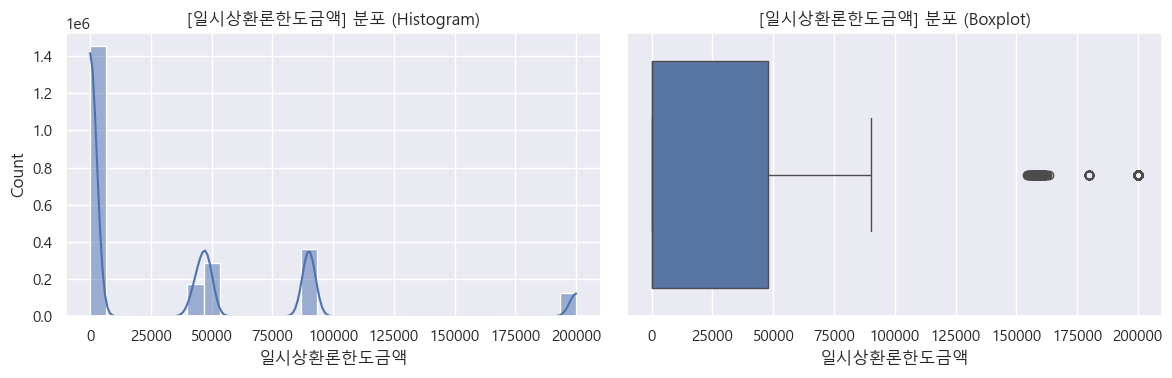

⚠️ 최대 5개까지만 시각화합니다.


In [34]:
plot_numeric_distributions(credit_df, columns=nom_cols, show_box=True, max_plots=5)

### 컬럼 간 상관이 있을 것으로 판단되어 그룹으로 묶어서 진행

## RV 관련 컬럼, 리볼링

In [37]:
# RV, 리볼링 관련 변수들만 추출
# 리볼빙 관련 컬럼 자동 추출
revolving_cols = [col for col in credit_df.columns if '리볼빙' in col or 'RV' in col]

# 확인
print("리볼빙 관련 변수 목록:")
for col in revolving_cols:
    print(f" - {col}")

리볼빙 관련 변수 목록:
 - RV일시불이자율_할인전
 - RV현금서비스이자율_할인전
 - RV신청일자
 - RV약정청구율
 - RV최소결제비율
 - RV전환가능여부


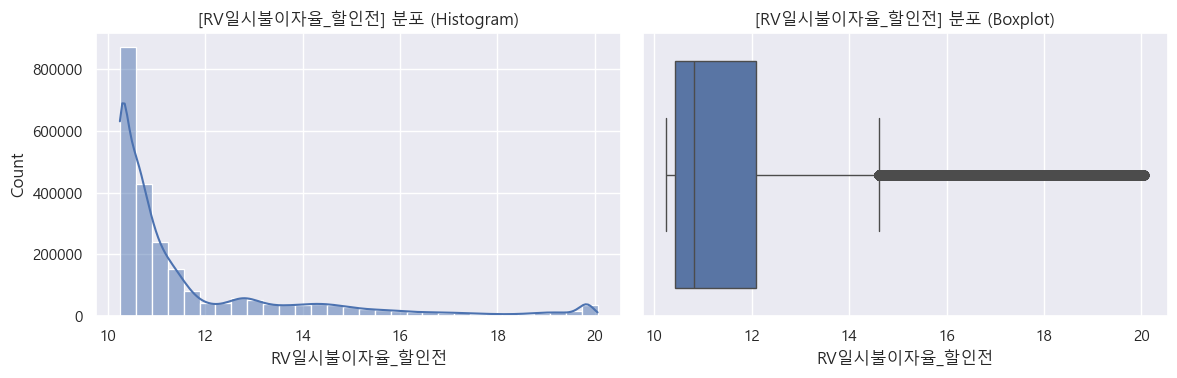

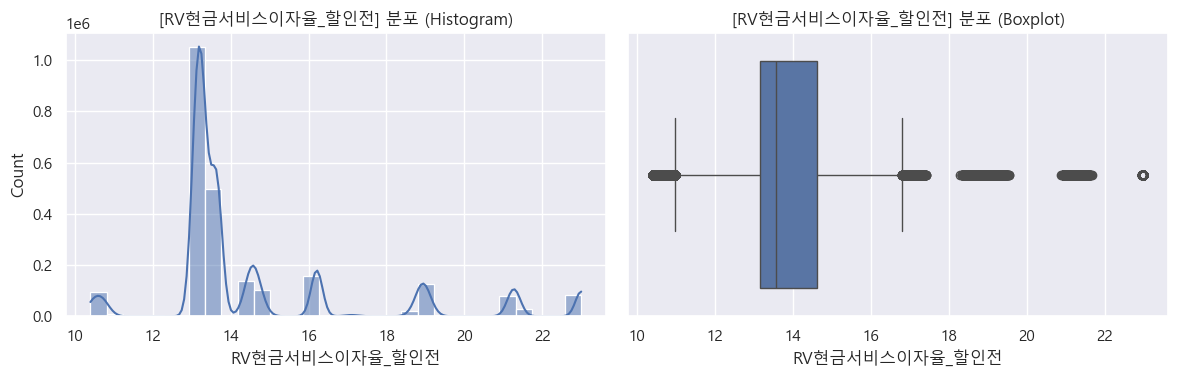

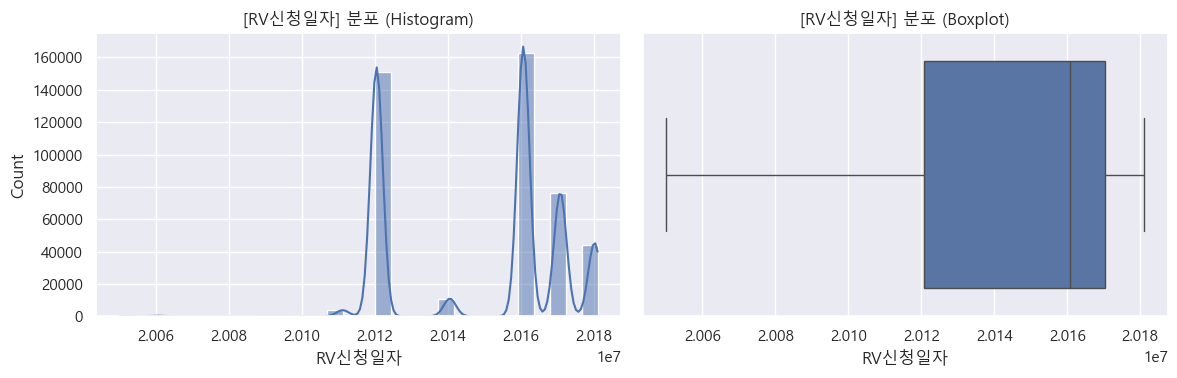

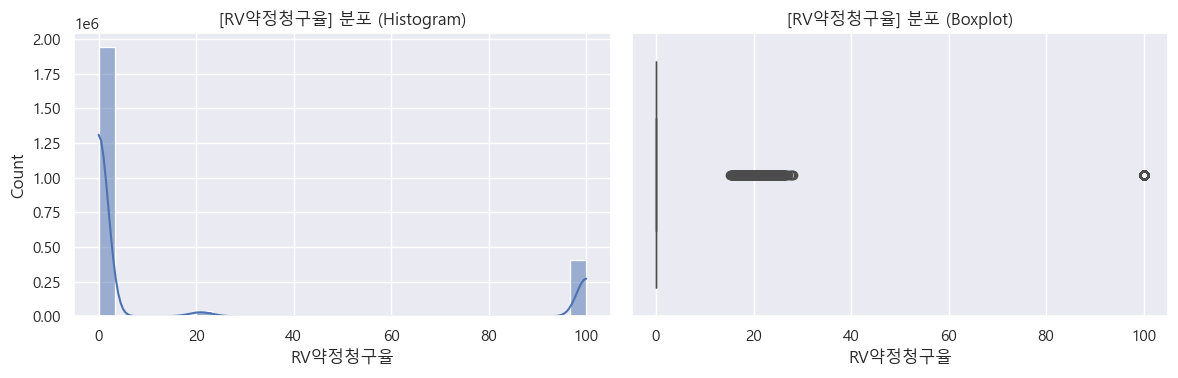

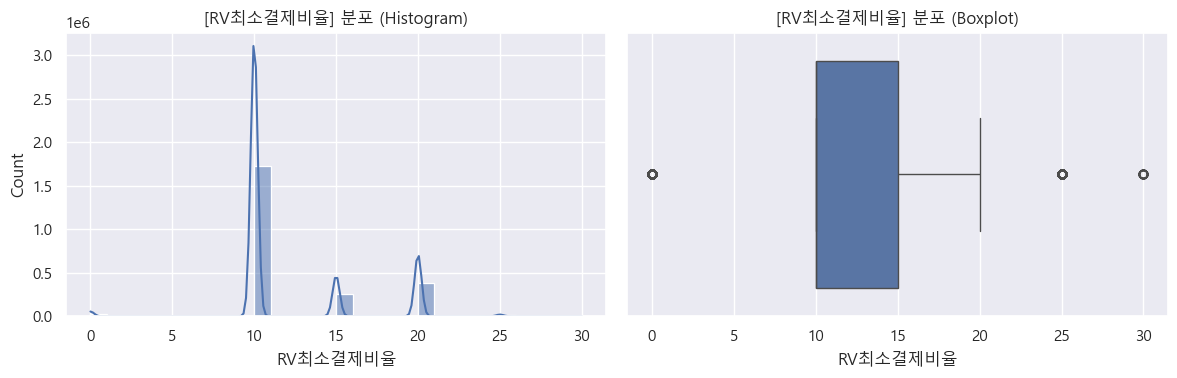

In [38]:
# 수치형 리볼빙 변수만 추출해서 시각화
revolving_numeric = credit_df[revolving_cols].select_dtypes(include=['float64', 'int64']).columns.tolist()
plot_numeric_distributions(credit_df, columns=revolving_numeric)

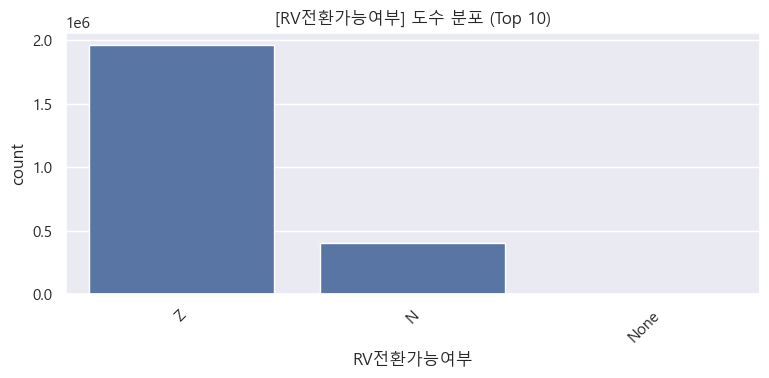

,RV전환가능여부
RV전환가능여부,
Z,1964098
N,406429
None,29473


In [39]:
# 범주형 리볼빙 변수만 추출해서 시각화
revolving_categorical = credit_df[revolving_cols].select_dtypes(include='object').columns.tolist()
plot_categorical_distributions(credit_df[revolving_categorical])

### RV약정청구율

In [41]:
credit_df_with_segment['RV약정청구율'].value_counts()

RV약정청구율
0.000000     1945051
99.999800     403072
19.740703          3
21.017702          2
21.225980          2
              ...   
20.104295          1
21.853420          1
19.879610          1
20.267732          1
22.651934          1
Name: count, Length: 51763, dtype: int64

## ✅ RV약정청구율 분포 분석 및 방향성 제안

### 1. 그래프 해석 요약

- `RV약정청구율` 변수의 분포는 **0 또는 99.9998에 대부분 집중**되어 있음
  - `0` : 리볼빙 약정을 전혀 사용하지 않은 고객 (약 81%)
  - `99.9998` : 전액 리볼빙 설정 고객 (약 17%)
  - 나머지 소수는 부분 사용 고객으로, **중간값 분포는 극히 드묾**
- 이로 인해:
  - **히스토그램**에서는 두 개의 봉우리 형태가 관찰됨
  - **박스플롯**에서는 대부분이 이상치로 인식되어 좌우로 치우친 형태가 나타남

---

### 2. 분석 방향성

#### 🔹 (1) 범주형 변수로 재구성
- `RV약정청구율`을 아래와 같이 **3분류 파생 변수로 재구성**하는 것이 적절함:
  - `'미사용'` : 0
  - `'전액사용'` : 99.9998
  - `'부분사용'` : 이외의 값

#### 🔹 (2) 고객 세그먼트와의 관계 분석
- 파생된 변수(`RV약정청구_유무`)를 기반으로 **Segment 컬럼과의 교차표**를 작성
- 시각화(countplot)를 통해 **어떤 세그먼트가 리볼빙 사용률이 높은지** 파악 가능

#### 🔹 (3) 향후 활용 방향
- 리볼빙 사용 여부는 고객의 **부채 성향 또는 상환 전략**과 밀접한 변수임
- 이후 **연체 예측, 신용 위험 예측** 모델링에서 **의미 있는 설명 변수**로 활용 가능

---

### ✅ 다음 단계 제안
1. `RV약정청구_유무` 파생 변수 생성
2. 고객 세그먼트와의 관계 분석 (교차표 + 시각화)
3. 다른 리볼빙 관련 변수들과도 동일한 분석 방식 적용


In [43]:
# RV약정청구_유무 파생변수 생성
# 0이면 '미청구', 나머지(특히 99.9998 등)면 '청구'
credit_df_with_segment['RV약정청구_유무'] = credit_df_with_segment['RV약정청구율'].apply(
    lambda x: '청구' if x > 0 else '미청구'
)

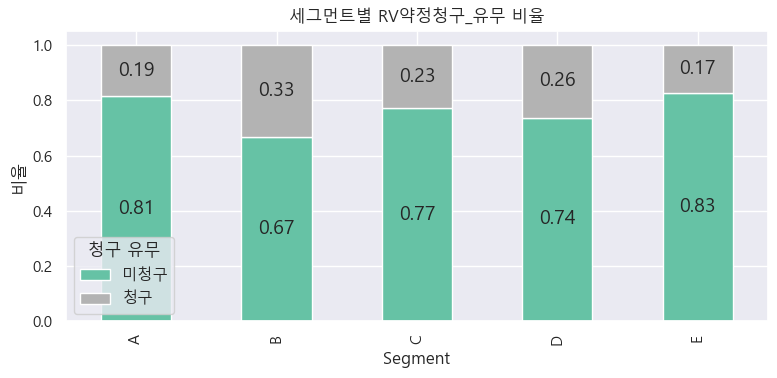

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 세그먼트별 청구/미청구 비율 계산
ctab = pd.crosstab(credit_df_with_segment['Segment'], 
                   credit_df_with_segment['RV약정청구_유무'], 
                   normalize='index')

# 시각화
ax = ctab.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='Set2')
plt.title("세그먼트별 RV약정청구_유무 비율")
plt.ylabel("비율")
plt.xlabel("Segment")
plt.legend(title="청구 유무")

# 바 차트에 비율 값 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center')

plt.tight_layout()
plt.show()


In [45]:
# 실제 교차표 수치도 함께 출력
print("\n📊 세그먼트별 RV약정청구_유무 도수 분포")
print(pd.crosstab(credit_df_with_segment['Segment'], 
                  credit_df_with_segment['RV약정청구_유무']))

print("\n📊 세그먼트별 RV약정청구_유무 비율")
print(ctab.round(3))


📊 세그먼트별 RV약정청구_유무 도수 분포
RV약정청구_유무      미청구      청구
Segment                   
A              792     180
B               96      48
C            98451   29139
D           257416   91826
E          1588296  333756

📊 세그먼트별 RV약정청구_유무 비율
RV약정청구_유무    미청구     청구
Segment                
A          0.815  0.185
B          0.667  0.333
C          0.772  0.228
D          0.737  0.263
E          0.826  0.174


### 📌 RV약정청구_유무와 세그먼트 간 관계 분석

세그먼트별로 RV약정청구 여부를 구분한 결과는 다음과 같다:

| Segment | 미청구 비율 | 청구 비율 |
|---------|-------------|------------|
| A       | 81.5%       | 18.5%      |
| B       | 66.7%       | **33.3%**  |
| C       | 77.2%       | 22.8%      |
| D       | 73.7%       | 26.3%      |
| E       | 82.6%       | 17.4%      |

#### 🔍 인사이트 요약
- Segment B는 청구 비율이 가장 높아 리볼빙 활용도가 높을 가능성이 있음.
- Segment A와 E는 미청구 비율이 높아 보수적인 성향을 가질 수 있음.
- Segment C와 D는 중간 수준의 활용도를 보여줌.

#### 🧭 향후 방향성
- 리볼빙 청구 여부에 영향을 주는 주요 변수 탐색
- `RV약정청구_유무`를 목표로 한 예측모델 설계 가능성 고려


### 📌 RV약정청구율 vs 파생변수(RV약정청구_유무) 비교

#### 🔍 분석 배경
`RV약정청구율`은 연속형 변수지만, 대부분의 값이 `0` 또는 `99.9998`에 몰려 있어 이진 분포처럼 작동합니다. 이를 바탕으로 `청구 여부` 파생변수를 생성하여 세그먼트별 비교를 수행했습니다.

#### ✅ 비교 결과
- 시각화 결과에서 **기존 변수와 파생 변수 모두 거의 유사한 분포를 보임**
- 실제로 `RV약정청구율`은 특정 구간에 몰려있기 때문에 파생변수로 단순화해도 정보 손실이 적음

#### 💡 인사이트
- 시각화, 분포 비교, 고객군 설명을 위한 분석 목적이라면 **파생변수(RV약정청구_유무)** 사용이 더 직관적이고 효율적
- 반면 회귀분석, 정량적 모델에는 원래의 **연속형 변수 유지**가 더 나음

#### 🧭 향후 활용 방향
- 고객군별 행동 특성 파악, 리볼빙 활용도 비교에는 파생변수 사용
- 정밀 예측 모델에는 원 변수 그대로 활용


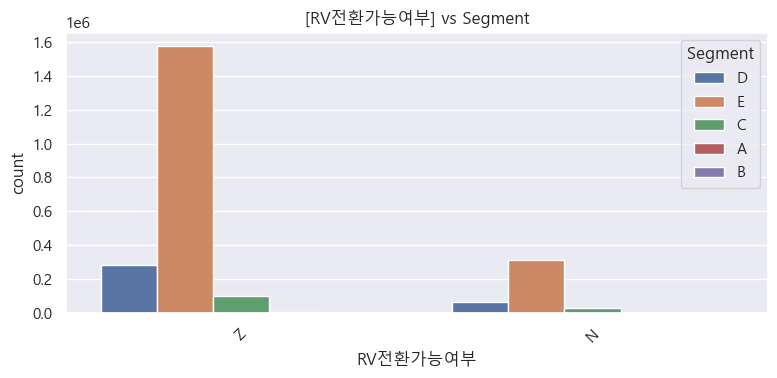

In [48]:
# 세그먼트별 도수분포 (범주형)
for col in revolving_categorical:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=credit_df_with_segment, x=col, hue="Segment", order=credit_df_with_segment[col].value_counts().index)
    plt.title(f"[{col}] vs Segment")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## RV전환가능여부 변수 검토 및 삭제 판단

### 🔍 변수 설명
- 해당 변수는 고객이 리볼빙(RV)으로의 전환이 **가능한지 여부(Y/N)**를 나타냄
- 일부 결측치 존재

### 📊 분석 결과
- 세그먼트별로 전환 가능 여부(Y/N)에 따른 **분포 차이가 뚜렷하지 않음**
  - 특히 Segment E에서 전환 가능/불가능 모두 높은 수치를 보여 **세그먼트 간 구분력이 떨어짐**
- 결측치가 존재하면서도, 의미 있는 인사이트 도출에는 기여하지 않음

### ✅ 삭제 근거 요약
- 세그먼트 간 구분력 부족
- 결측치 존재
- RV 사용 여부, 경과일 등 더 신뢰성 높은 변수들이 이미 존재함

따라서 **모델링 혹은 분석 시 해당 변수는 제거하는 것이 적절**함


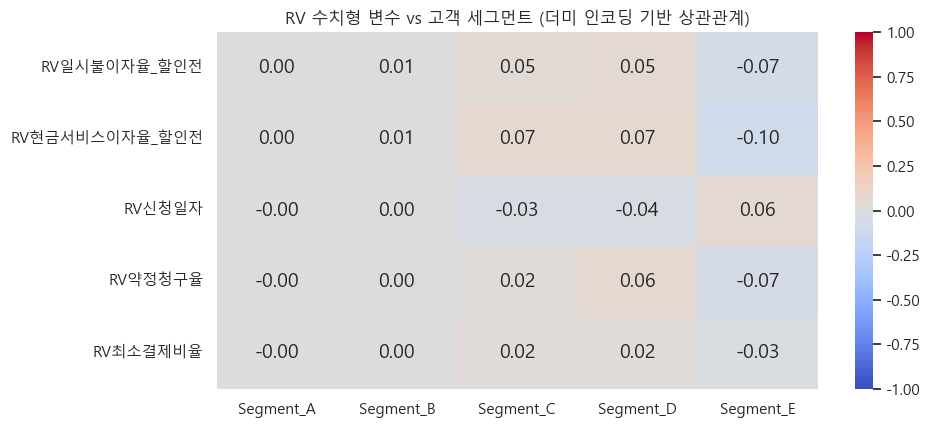

In [50]:
# RV 수치형 컬럼들과 고객 세그먼트 상관
# 1. Segment를 더미 변수로 인코딩
df_corr = credit_df_with_segment.copy()
segment_dummies = pd.get_dummies(df_corr['Segment'], prefix='Segment')
df_corr = pd.concat([df_corr, segment_dummies], axis=1)

# 2. RV 관련 수치형 컬럼만 필터링
rv_cols = [col for col in df_corr.columns if 'RV' in col and df_corr[col].dtype in ['float64', 'int64']]

# 3. 상관계수 계산: RV 변수 vs Segment 더미
corr_df = df_corr[rv_cols + list(segment_dummies.columns)].corr()

# 4. 히트맵 시각화 (RV 변수 vs Segment 더미들만 추출)
plt.figure(figsize=(10, len(rv_cols) * 0.5 + 2))
sns.heatmap(
    corr_df.loc[rv_cols, segment_dummies.columns],  # 행: RV, 열: 세그먼트
    annot=True, fmt=".2f", cmap="coolwarm", cbar=True, vmax=1, vmin=-1
)
plt.title("RV 수치형 변수 vs 고객 세그먼트 (더미 인코딩 기반 상관관계)")
plt.tight_layout()
plt.show()

### 추가적 분석 가능성

## RV 현금서비스이자율_할인전

## 🔍 RV 수치형 변수 중 고객 세그먼트와의 상관관계 분석 결과 요약

### ✅ 주요 해석 요약

- **`RV현금서비스이자율_할인전`** 변수는 고객 세그먼트와 가장 뚜렷한 상관관계를 보임
  - Segment_C, Segment_D와는 **양의 상관관계 (0.07)**  
    → 해당 그룹은 **높은 이자율**을 적용받고 있는 경향
  - Segment_E와는 **음의 상관관계 (-0.10)**  
    → 이 그룹은 **낮은 이자율**을 적용받는 경향

> 참고: 상관계수 자체는 높지 않지만, 다른 변수들과 비교했을 때 상대적으로 의미 있는 차이를 보여줌

---

### 🎯 왜 주목해야 하는가?

- **다른 RV 관련 변수들보다 세그먼트별 차이를 더 분명하게 보여주는 변수**
- **이자율 정책, 고객 위험 등급, 마케팅 분류 기준 등과의 연관 가능성** 내포

---

### 🔧 향후 분석 방향 제안

1. **분포 재확인**  
   - `RV현금서비스이자율_할인전`의 히스토그램과 박스플롯으로 분포 시각화

2. **세그먼트별 평균 이자율 비교**
   - `credit_df_with_segment.groupby("Segment")["RV현금서비스이자율_할인전"].mean()`  
     → 실제 평균 이자율 차이 확인

3. **파생 변수 생성 가능성 검토**
   - 예: `고이자 여부` (예: 15% 이상을 기준으로 그룹화)
   - 이후, 이진 변수 기준으로 세그먼트와 관계 분석 가능

---


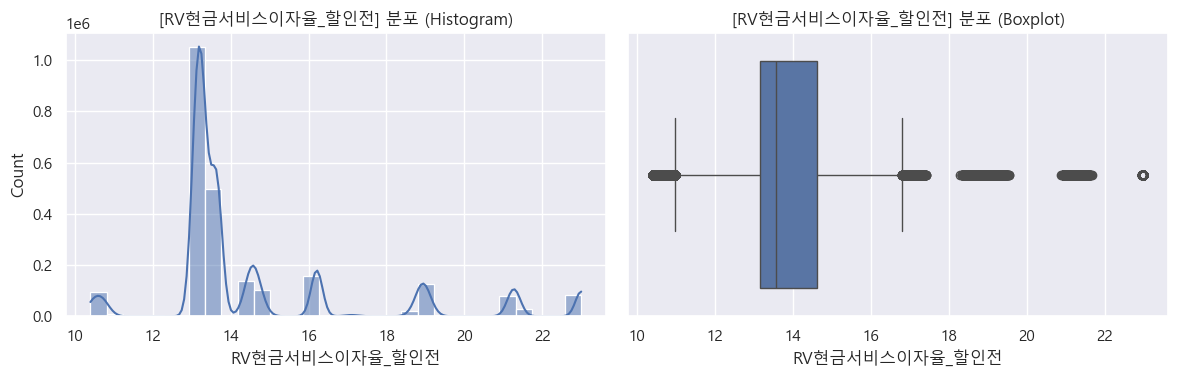

In [54]:
# 1. 분포 재확인 (RV현금서비스이자율_할인전)
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(credit_df_with_segment['RV현금서비스이자율_할인전'], kde=True, bins=30)
plt.title("[RV현금서비스이자율_할인전] 분포 (Histogram)")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=credit_df_with_segment['RV현금서비스이자율_할인전'])
plt.title("[RV현금서비스이자율_할인전] 분포 (Boxplot)")

plt.tight_layout()
plt.show()

📊 세그먼트별 평균 RV현금서비스이자율_할인전:
Segment
B    17.446543
C    15.332869
A    15.220041
D    15.016303
E    14.444477
Name: RV현금서비스이자율_할인전, dtype: float64


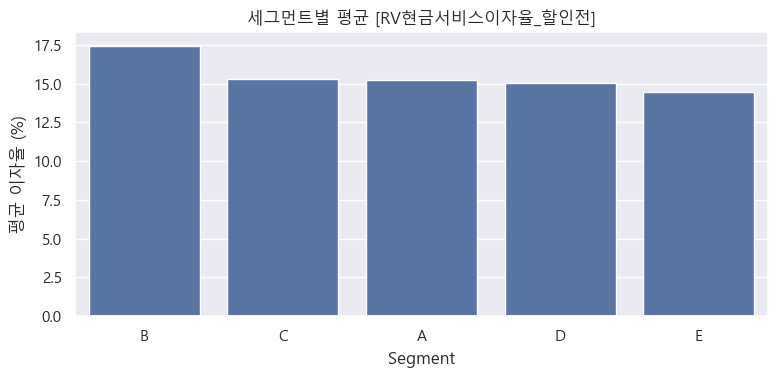

In [55]:
# 2. 세그먼트별 평균 이자율 비교
segment_avg_rate = credit_df_with_segment.groupby("Segment")["RV현금서비스이자율_할인전"].mean().sort_values(ascending=False)
print("📊 세그먼트별 평균 RV현금서비스이자율_할인전:")
print(segment_avg_rate)

# 시각화
plt.figure(figsize=(8, 4))
sns.barplot(x=segment_avg_rate.index, y=segment_avg_rate.values)
plt.title("세그먼트별 평균 [RV현금서비스이자율_할인전]")
plt.ylabel("평균 이자율 (%)")
plt.xlabel("Segment")
plt.tight_layout()
plt.show()


## RV현금서비스이자율_할인전 vs 고객 세그먼트 관계 요약

- `RV현금서비스이자율_할인전`의 세그먼트별 평균 이자율은 다음과 같음:

| Segment | 평균 이자율 (%) |
|---------|----------------|
| B       | 17.45          |
| C       | 15.33          |
| A       | 15.22          |
| D       | 15.02          |
| E       | 14.44          |

- 이자율이 낮을수록 고객이 `Segment E`로 분류되는 경향이 나타남.
- 이는 Segment E가 **상대적으로 신용 상태가 좋은 고객 집단**일 가능성을 시사함.

### 🔍 분석 방향
- 평균 이자율(약 15.3%)을 기준으로 고객을 고이자 / 저이자 그룹으로 나눈 후,
- 세그먼트별로 고이자 고객의 비중을 시각화하고,
- 신용 리스크 측면에서 리볼빙 사용 패턴을 탐색 가능함.


RV현금서비스이자율_할인전 평균값: 14.58%
📊 세그먼트별 고이자/저이자 비율:


고이자여부,고이자,저이자
Segment,,
A,0.324074,0.675926
B,0.555556,0.444444
C,0.351046,0.648954
D,0.312179,0.687821
E,0.244643,0.755357


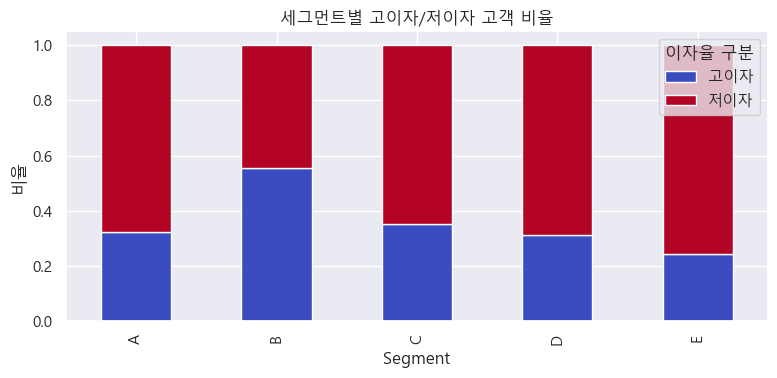

In [57]:
# RV현금서비스이자율_할인전 평균값 계산
rv_avg = credit_df_with_segment['RV현금서비스이자율_할인전'].mean()
print(f"RV현금서비스이자율_할인전 평균값: {rv_avg:.2f}%")

# 평균 기준 고이자 여부 파생 변수 생성
credit_df_with_segment['고이자여부'] = credit_df_with_segment['RV현금서비스이자율_할인전'].apply(
    lambda x: '고이자' if x >= rv_avg else '저이자'
)

# 세그먼트별 고이자/저이자 비율 계산
ratio_df = pd.crosstab(
    credit_df_with_segment['Segment'],
    credit_df_with_segment['고이자여부'],
    normalize='index'
)

# 결과 출력
print("📊 세그먼트별 고이자/저이자 비율:")
display(ratio_df)

# 시각화
ratio_df.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='coolwarm')
plt.title("세그먼트별 고이자/저이자 고객 비율")
plt.ylabel("비율")
plt.xlabel("Segment")
plt.legend(title="이자율 구분")
plt.tight_layout()
plt.show()

In [58]:
# 분석 대상 RV 컬럼 리스트
target_cols = [
    "RV일시불이자율_할인전",
    "RV신청일자",
    "RV약정청구율",
    "RV최소결제비율"
]

# Segment별 평균값 계산
RV_mean_selected = credit_df_with_segment.groupby("Segment")[target_cols].mean().T

# 결과 출력
display(RV_mean_selected)

Segment,A,B,C,D,E
RV일시불이자율_할인전,1.199060e+01,1.327900e+01,1.221927e+01,1.207604e+01,1.169869e+01
RV신청일자,2.014488e+07,2.015922e+07,2.014693e+07,2.014788e+07,2.015069e+07
RV약정청구율,1.537753e+01,2.955799e+01,1.990075e+01,2.298816e+01,1.602833e+01
RV최소결제비율,1.192899e+01,1.340275e+01,1.247372e+01,1.225726e+01,1.200655e+01


In [59]:
# 고/저 분류 함수 생성 및 적용
for col in target_cols:
    avg_val = RV_mean_selected.loc[col].mean()
    new_col = f"{col}_고저구분"
    
    credit_df_with_segment[new_col] = credit_df_with_segment[col].apply(
        lambda x: '고' if x >= avg_val else '저'
    )

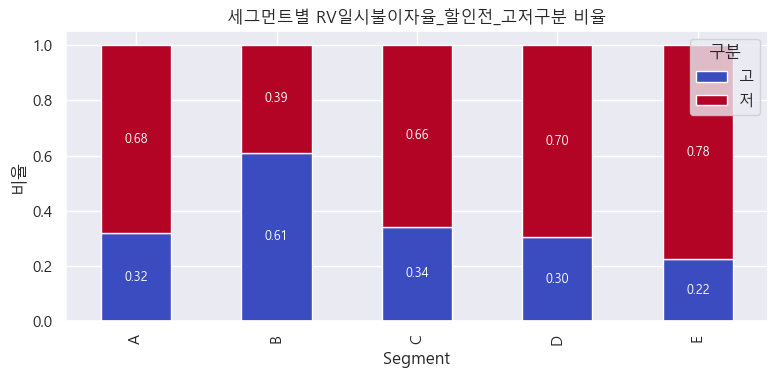

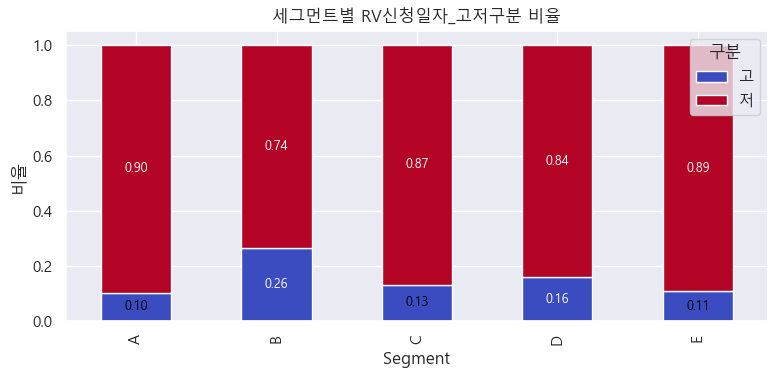

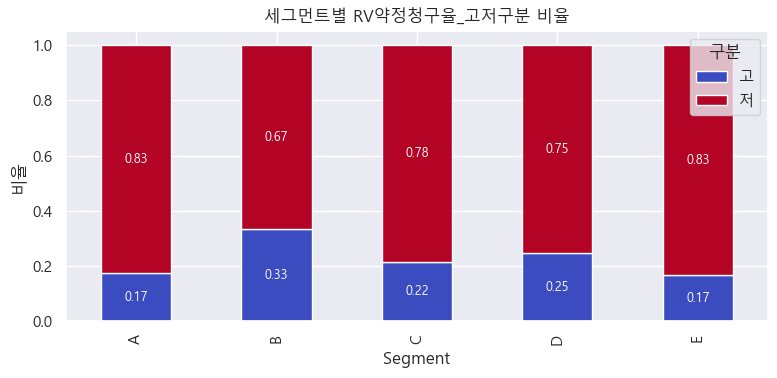

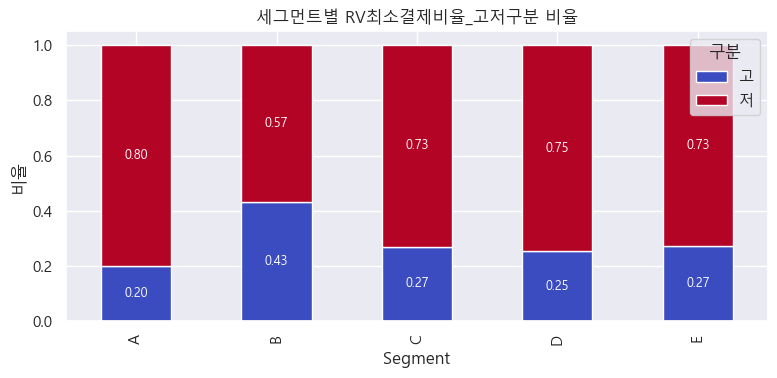

In [60]:
# 시각화 함수 정의 (비율 값도 함께 출력)
def plot_segment_ratio(col_label):
    ctab = pd.crosstab(credit_df_with_segment['Segment'], credit_df_with_segment[col_label], normalize='index')
    ax = ctab.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='coolwarm')

    plt.title(f"세그먼트별 {col_label} 비율")
    plt.ylabel("비율")
    plt.xlabel("Segment")
    plt.legend(title="구분")
    plt.ylim(0, 1.05)  # 그래프 여유 공간 확보

    # 비율 텍스트 표시
    for p in ax.patches:
        height = p.get_height()
        if height > 0.01:  # 너무 작으면 생략
            ax.text(
                p.get_x() + p.get_width() / 2,
                p.get_y() + height / 2,
                f"{height:.2f}",
                ha='center',
                va='center',
                fontsize=9,
                color='white' if height > 0.15 else 'black'
            )

    plt.tight_layout()
    plt.show()

# 각 변수에 대해 시각화 실행
for col in target_cols:
    plot_segment_ratio(f"{col}_고저구분")

### 💡 RV 관련 변수와 고객 세그먼트 간의 관계 분석 정리

---

#### ✅ 1. `RV현금서비스이자율_할인전`에 따른 고이자 여부와 세그먼트 분포

| Segment | 고이자 비율 | 저이자 비율 |
|---------|--------------|--------------|
| A       | 29.2%        | 70.8%        |
| B       | **55.6%**    | 44.4%        |
| C       | 30.6%        | 69.4%        |
| D       | 26.0%        | 74.0%        |
| E       | 19.5%        | 80.5%        |

- **Segment B**에서 고이자율을 적용받는 고객 비율이 **유독 높음**  
- 이는 `RV현금서비스이자율_할인전`이 고객을 **B 세그먼트로 분류하는 데 있어 주요한 특징 변수로 작용할 가능성**이 있음

---

#### ✅ 2. 그 외 RV 관련 변수들의 세그먼트별 평균값

| RV 관련 변수              | A         | B         | C         | D         | E         |
|---------------------------|-----------|-----------|-----------|-----------|-----------|
| RV일시불이자율_할인전     | 11.99     | **13.28** | 12.22     | 12.08     | 11.70     |
| RV신청일자                | 2014.9M   | **2015.9M** | 2014.7M   | 2014.8M   | 2015.1M   |
| RV약정청구율              | 15.38     | **29.56** | 19.90     | 22.99     | 16.03     |
| RV최소결제비율            | 11.93     | **13.40** | 12.47     | 12.26     | 12.01     |

- 전반적으로 **Segment B**는 다른 세그먼트 대비 평균 이자율, 약정청구율, 최소결제비율 등이 **높은 특징**을 보임  
- 이는 Segment B가 **높은 금리와 높은 약정 비율을 가진, 상대적으로 신용 리스크가 높거나 이자부담이 큰 그룹**일 가능성을 시사함

---

#### 🔎 3. 향후 분석 방향 제안

- `Segment B`는 **다른 그룹과 구별되는 금리 특성을 가지고 있음** → 이자 관련 변수들이 군집화, 분류 분석에서 유의미한 feature로 활용될 수 있음
- `RV현금서비스이자율_할인전`, `RV약정청구율`, `RV최소결제비율` 등은 **고이자군(High interest group)** 식별을 위한 주요 변수 후보
- 추후 분류모델(예: Random Forest, XGBoost 등)에서 **feature importance 분석을 통해 해당 변수들의 중요도 검증** 가능

---


In [62]:
# RV최초시작후경과일의 Segment별 평균 계산
# 99999999 따로 빼서 확인해야 된다.
# 이상치 값 정의
invalid_value = 99999999

# 이상치 제외한 값만 필터링
filtered_df = credit_df_with_segment[credit_df_with_segment["rv최초시작후경과일"] != invalid_value]

# 세그먼트별 평균 계산
rv_days_mean_filtered = (
    filtered_df.groupby("Segment")["rv최초시작후경과일"]
    .mean()
    .sort_values(ascending=False)
)

# 결과 출력
display(rv_days_mean_filtered)


Segment
A    1424.011111
C    1377.815888
D    1337.556302
E    1233.516315
B     832.851064
Name: rv최초시작후경과일, dtype: float64

## `rv최초시작후경과일` 변수 재해석 (이상치 제거 후)

이전 분석에서는 `rv최초시작후경과일` 컬럼에 `99999999`와 같은 명백한 이상치가 포함되어 있어 평균값이 왜곡될 수 있는 문제가 있었습니다. 이에 따라 해당 값을 제거한 뒤 세그먼트별 평균을 다시 계산한 결과는 다음과 같습니다:

| Segment | 평균 rv최초시작후경과일 |
|---------|------------------------|
| A       | 1424.01                |
| C       | 1377.82                |
| D       | 1337.56                |
| E       | 1233.52                |
| B       |  832.85                |

### 📌 해석 및 인사이트

- **Segment A**가 평균적으로 `rv최초시작후경과일`이 가장 높아, **리볼빙 계약을 오래 유지한 고객 비중이 가장 높은 군**으로 해석됩니다.
- 반대로 **Segment B**는 가장 낮은 평균값을 보여 **리볼빙 시작 후 기간이 짧은, 즉 최근에 시작한 고객**이 많은 것으로 볼 수 있습니다.
- Segment E 역시 비교적 짧은 평균 경과일을 보여, **리볼빙 고객군 중에서는 비교적 신생**에 가까운 특성이 있습니다.
- 이러한 분포는 기존에 분석했던 **신규/기존 리볼빙 이용자 구분** 및 **고객 성숙도에 따른 세그먼트 특성**과도 일치하는 경향을 보입니다.

### ✅ 시사점

- `rv최초시작후경과일` 변수는 이상치를 제거한 뒤 활용할 경우, **세그먼트의 고객 리볼빙 경과 수준을 파악할 수 있는 유용한 지표**로 활용될 수 있습니다.
- 특히 A, B 세그먼트를 구분하거나, **리볼빙 장기이용자 vs 신규이용자 군 분석** 시 주요 기준으로 사용할 수 있습니다.

### 이와 관련된 컬럼들
- 한도
- CA
- 시장 단기

In [65]:
# 키워드별 관련 변수 자동 추출
# 한도, CA, 시장단기 같이 묶어서 본다.
limit_cols     = [col for col in credit_df_with_segment.columns if '한도' in col]
ca_cols        = [col for col in credit_df_with_segment.columns if 'CA' in col]
short_term_cols = [col for col in credit_df_with_segment.columns if '시장단기' in col or '시장 단기' in col]

In [66]:
# Segment 인코딩
df_corr = credit_df_with_segment.copy()
segment_dummies = pd.get_dummies(df_corr['Segment'], prefix='Segment')
df_corr = pd.concat([df_corr, segment_dummies], axis=1)


# 각 그룹별 수치형 변수만 추출
def filter_numeric(cols):
    return [col for col in cols if df_corr[col].dtype in ['int64', 'float64']]

limit_cols_num     = filter_numeric(limit_cols)
ca_cols_num        = filter_numeric(ca_cols)
short_term_num     = filter_numeric(short_term_cols)

In [67]:
def plot_corr_heatmap_with_dummies(df, columns, segment_cols, title):
    if not columns:
        print(f"❌ [{title}] 관련 수치형 컬럼이 존재하지 않아서 히트맵을 생략합니다.")
        return

    # 상관계수 계산
    corr = df[columns + segment_cols].corr()

    # 히트맵: 변수 vs 세그먼트 더미들
    plt.figure(figsize=(10, len(columns) * 0.5 + 2))
    sns.heatmap(
        corr.loc[columns, segment_cols],  # 행: 분석 변수, 열: Segment 더미
        annot=True, fmt=".2f", cmap="coolwarm", vmax=1, vmin=-1
    )
    plt.title(f"{title} 변수 vs Segment (더미 인코딩 기반 상관관계)")
    plt.tight_layout()
    plt.show()

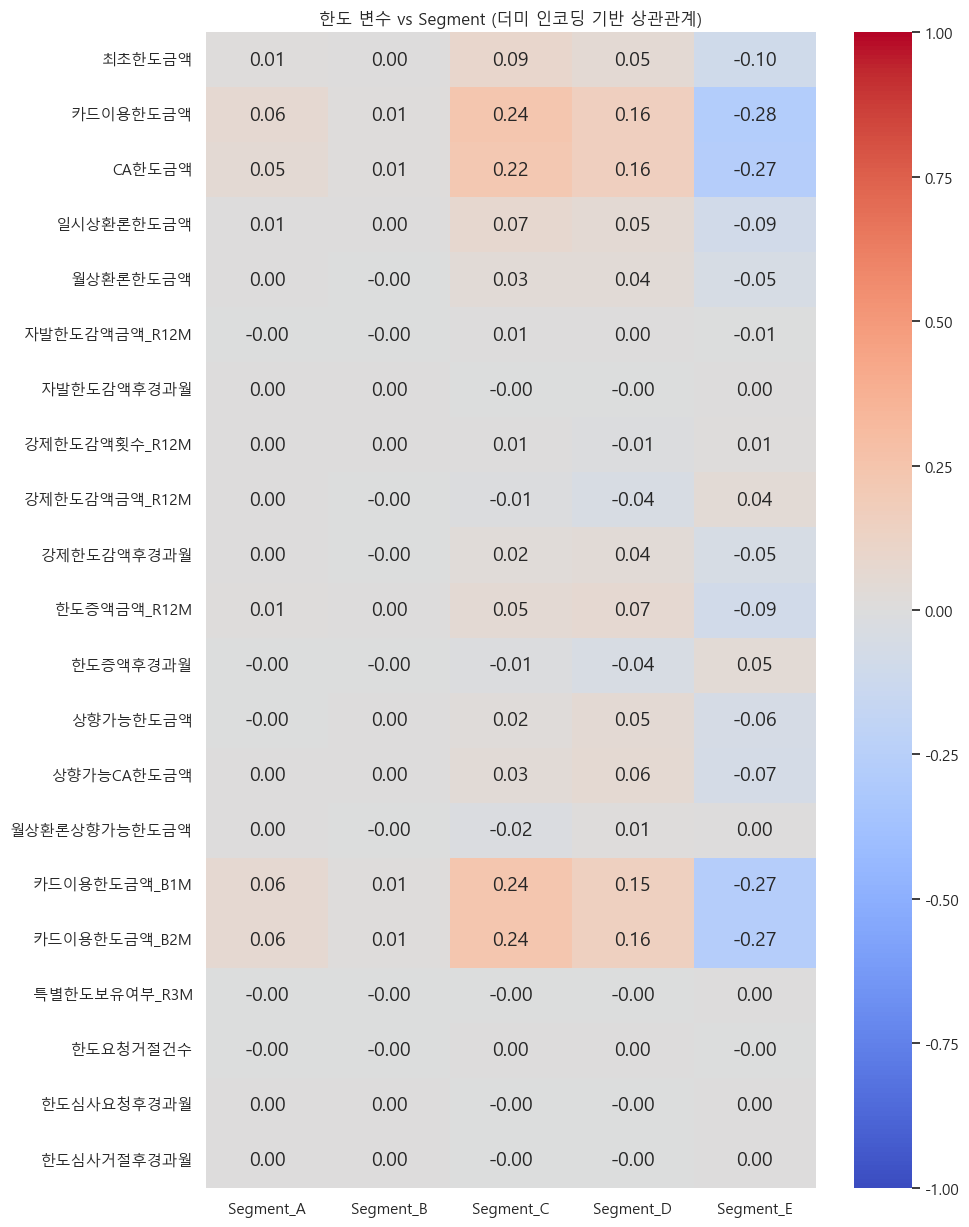

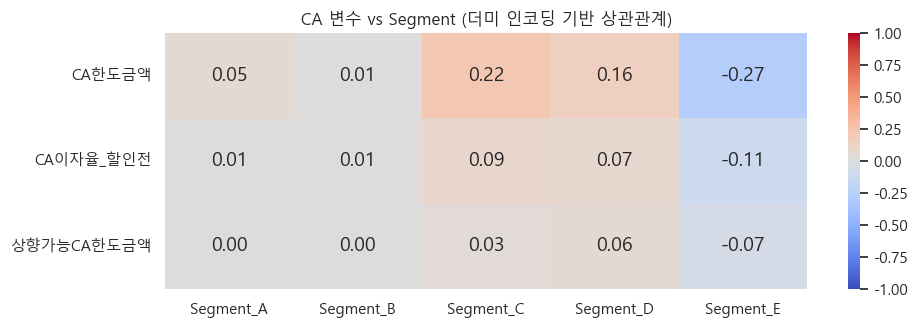

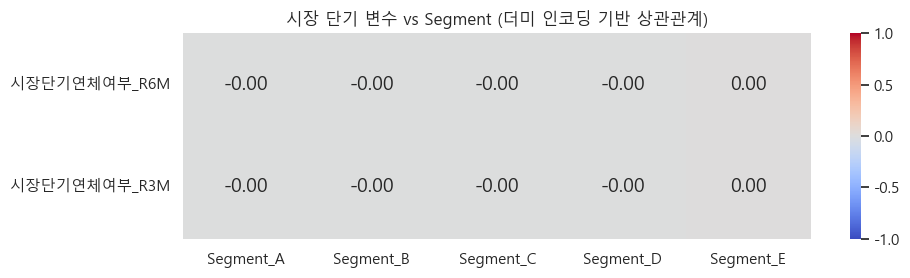

In [68]:
# 더미 컬럼 목록 (Segment_A ~ Segment_E)
segment_cols = [col for col in df_corr.columns if col.startswith("Segment_")]

# 그룹별 상관관계 히트맵 출력
plot_corr_heatmap_with_dummies(df_corr, limit_cols_num, segment_cols, "한도")
plot_corr_heatmap_with_dummies(df_corr, ca_cols_num, segment_cols, "CA")
plot_corr_heatmap_with_dummies(df_corr, short_term_num, segment_cols, "시장 단기")

In [69]:
credit_df_with_segment['시장단기연체여부_R3M'].value_counts()

시장단기연체여부_R3M
0    2399980
1         20
Name: count, dtype: int64

In [70]:
# 51명이 어떤 사람인지 실제 데이터 분포를 확인한다.
연체자들 = credit_df_with_segment[credit_df_with_segment['시장단기연체여부_R3M'] == 1].ID.value_counts().keys()

In [240]:
credit_df_with_segment['시장단기연체여부_R6M'].value_counts()

시장단기연체여부_R6M
0    2399949
1         51
Name: count, dtype: int64

In [248]:
# 51명이 어떤 사람인지 실제 데이터 분포를 확인한다.
연체자들1 = credit_df_with_segment[credit_df_with_segment['시장단기연체여부_R6M'] == 1].ID.value_counts().keys()
연체자들1

Index(['TRAIN_209225', 'TRAIN_386922', 'TRAIN_363665', 'TRAIN_060976',
       'TRAIN_175160', 'TRAIN_038147', 'TRAIN_057518', 'TRAIN_382410',
       'TRAIN_305959', 'TRAIN_194352', 'TRAIN_023691', 'TRAIN_177363',
       'TRAIN_145162', 'TRAIN_078479', 'TRAIN_378989', 'TRAIN_031820',
       'TRAIN_329454', 'TRAIN_064513', 'TRAIN_077634', 'TRAIN_355649',
       'TRAIN_016366', 'TRAIN_316130', 'TRAIN_277271', 'TRAIN_273693',
       'TRAIN_242694', 'TRAIN_236366', 'TRAIN_190332', 'TRAIN_116890',
       'TRAIN_349942'],
      dtype='object', name='ID')

In [250]:
credit_df_with_segment[credit_df_with_segment['ID'].isin(연체자들1)].drop_duplicates("ID").Segment.value_counts()

Segment
E    25
D     4
Name: count, dtype: int64

In [71]:
credit_df_with_segment[credit_df_with_segment['ID'].isin(연체자들)].drop_duplicates("ID")

,기준년월,ID,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,...,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일,Segment,RV약정청구_유무,고이자여부,RV일시불이자율_할인전_고저구분,RV신청일자_고저구분,RV약정청구율_고저구분,RV최소결제비율_고저구분
23691,201807,TRAIN_023691,0,4205,0,0,0,22.991646,22.997502,18.335165,...,0,0,99999999,D,미청구,고이자,고,저,저,고
60976,201807,TRAIN_060976,0,0,0,0,0,22.997081,22.997641,19.995966,...,0,0,99999999,E,미청구,고이자,고,저,저,고
77634,201807,TRAIN_077634,0,0,0,0,0,22.995969,22.995497,18.851161,...,0,0,99999999,E,미청구,고이자,고,저,저,고
116890,201807,TRAIN_116890,0,4067,0,0,0,22.991750,22.994487,19.294207,...,0,0,99999999,E,미청구,고이자,고,저,저,고
175160,201807,TRAIN_175160,0,0,0,0,0,22.999954,22.994139,19.182783,...,0,0,99999999,E,미청구,고이자,고,저,저,고
177363,201807,TRAIN_177363,0,0,0,0,0,22.997289,22.999954,20.045554,...,0,0,846,E,청구,고이자,고,고,고,고
209225,201807,TRAIN_209225,0,0,0,0,0,22.991955,22.997265,19.650915,...,0,0,99999999,E,미청구,고이자,고,저,저,고
273693,201807,TRAIN_273693,0,0,0,0,0,22.995608,22.996594,20.049490,...,0,0,99999999,E,미청구,고이자,고,저,저,고
363665,201807,TRAIN_363665,0,3624,0,0,0,22.991730,22.994662,19.620320,...,0,0,99999999,E,미청구,고이자,고,저,저,고
378989,201807,TRAIN_378989,0,0,0,0,0,22.994930,22.996956,19.204046,...,0,0,99999999,E,미청구,고이자,고,저,저,고


In [72]:
credit_df_with_segment[credit_df_with_segment['ID'].isin(연체자들)].drop_duplicates("ID").Segment.value_counts()

Segment
E    11
D     1
Name: count, dtype: int64

In [252]:
credit_df_with_segment['시장연체상환여부_R3M'].value_counts()

시장연체상환여부_R3M
0    2400000
Name: count, dtype: int64

In [254]:
credit_df_with_segment['시장연체상환여부_R6M'].value_counts()

시장연체상환여부_R6M
0    2399999
1          1
Name: count, dtype: int64

## 한도 관련 컬럼

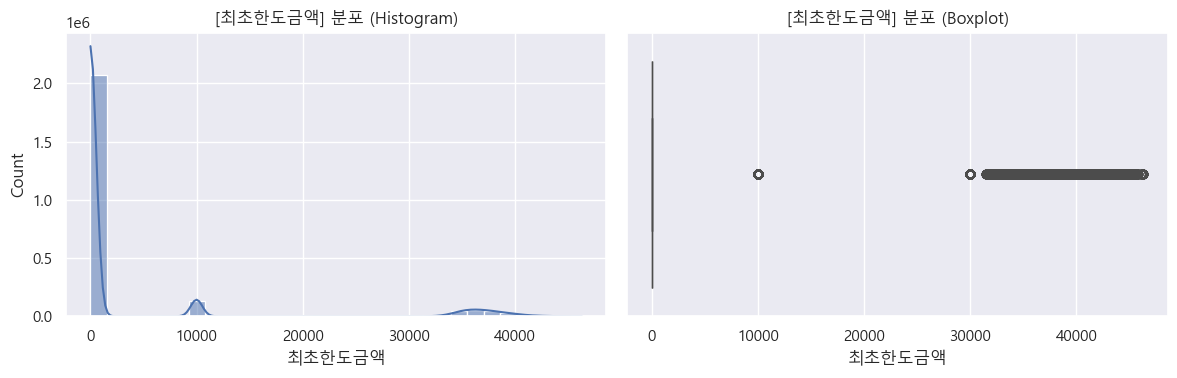

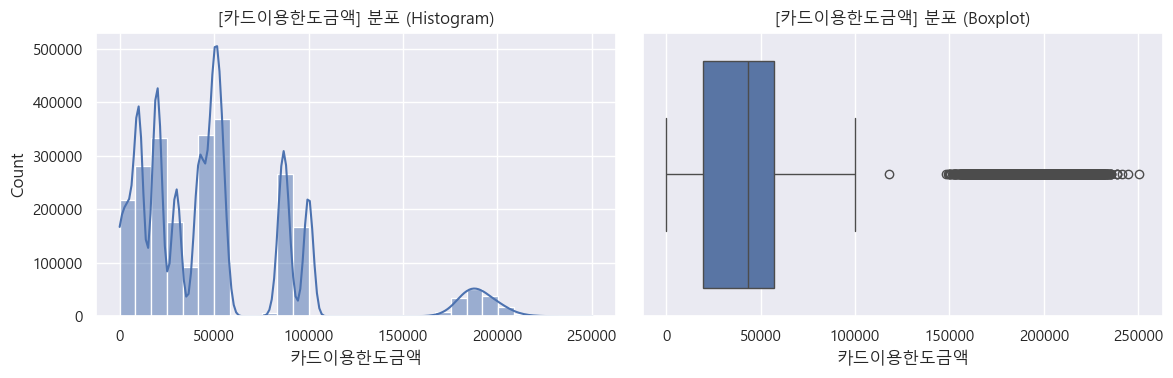

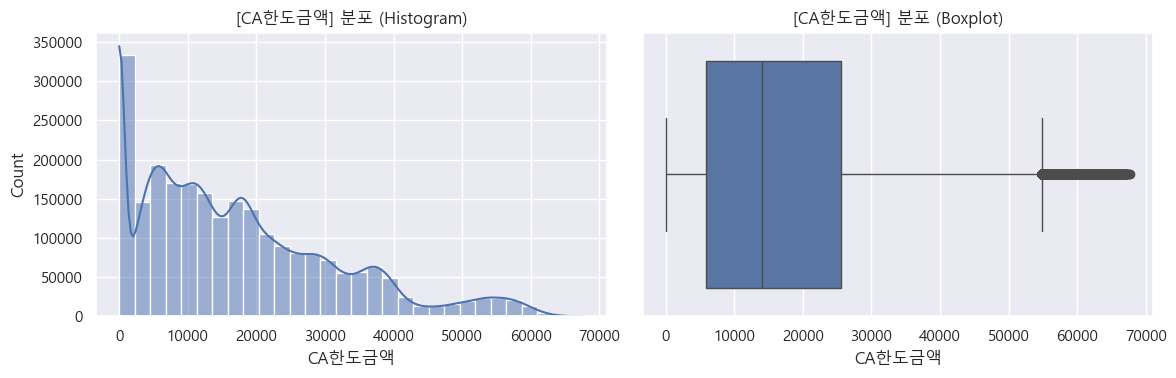

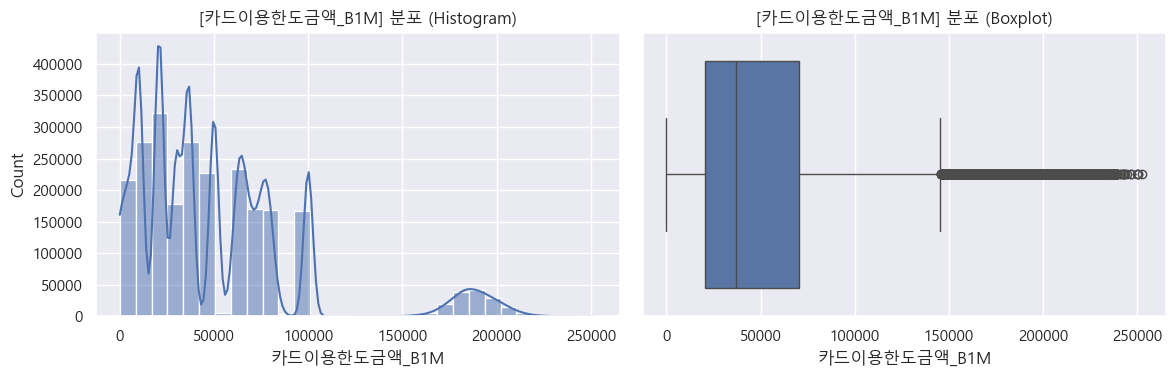

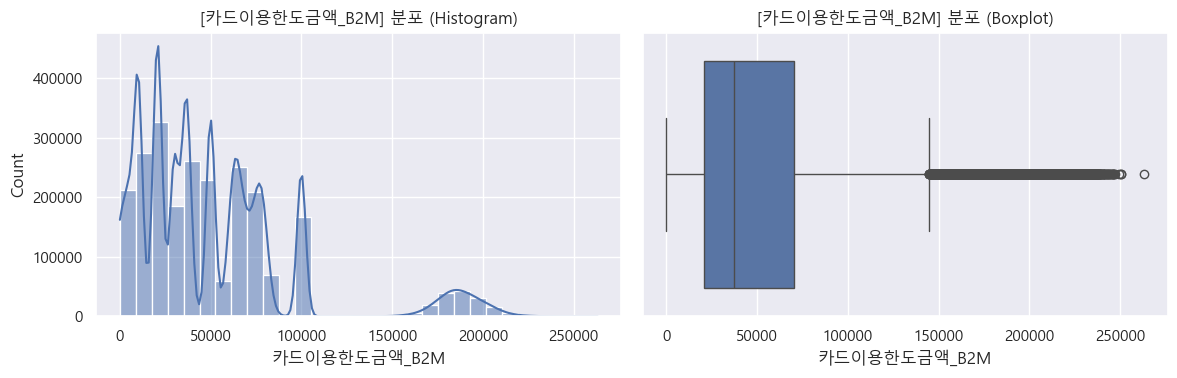

In [74]:
# 위의 히트맵 결과에 따라 상관관계가 0.1 이상인 컬럼들만 선별한다.
# 분석 대상 컬럼
limit_features = [
    "최초한도금액",
    "카드이용한도금액",
    "CA한도금액",
    "카드이용한도금액_B1M",
    "카드이용한도금액_B2M"
]


# 분포 시각화 함수
def plot_numeric_distribution(df, col):
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f"[{col}] 분포 (Histogram)")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col)
    plt.title(f"[{col}] 분포 (Boxplot)")

    plt.tight_layout()
    plt.show()

# 실행
for col in limit_features:
    plot_numeric_distribution(credit_df_with_segment, col)

In [75]:
# 세그먼트별 평균 계산
limit_mean = credit_df_with_segment.groupby("Segment")[limit_features].mean().T

# 보기 좋게 포맷팅
pd.options.display.float_format = '{:.2f}'.format
display(limit_mean)

Segment,A,B,C,D,E
최초한도금액,10844.28,4406.75,7531.92,4913.14,3152.00
카드이용한도금액,197598.83,126400.12,98017.10,69321.61,45248.45
CA한도금액,56036.48,38753.72,30767.31,22698.30,15297.53
카드이용한도금액_B1M,197902.48,123225.83,97536.93,68923.32,45451.76
카드이용한도금액_B2M,198553.41,123227.60,97410.10,68960.23,45532.96


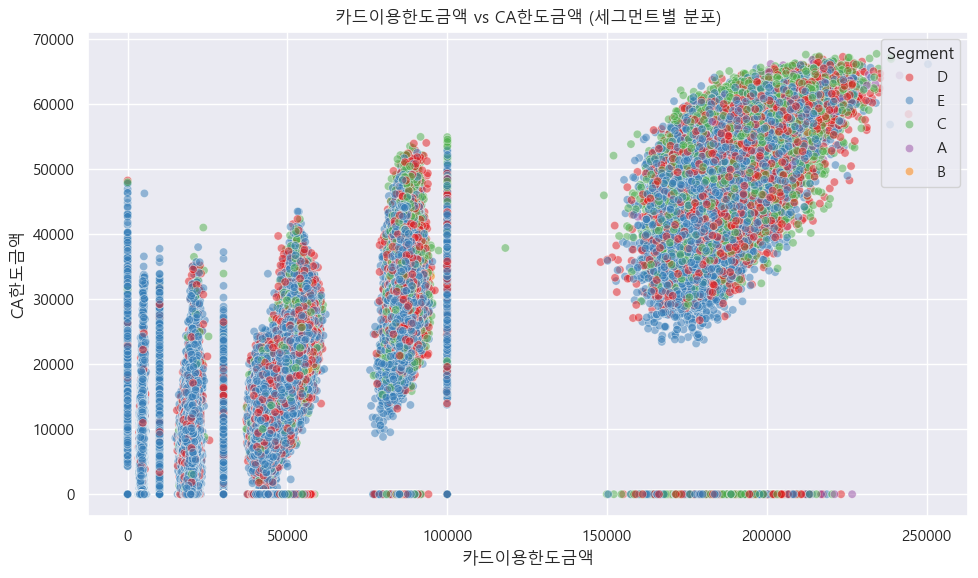

In [76]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정 (Windows 기본 폰트 중 하나인 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=credit_df_with_segment,
    x="카드이용한도금액",
    y="CA한도금액",
    hue="Segment",  # 색상으로 세그먼트 구분
    alpha=0.5,      # 투명도 조절
    palette="Set1"  # 컬러 팔레트
)

plt.title("카드이용한도금액 vs CA한도금액 (세그먼트별 분포)")
plt.xlabel("카드이용한도금액")
plt.ylabel("CA한도금액")
plt.legend(title="Segment", loc='upper right')
plt.tight_layout()
plt.show()

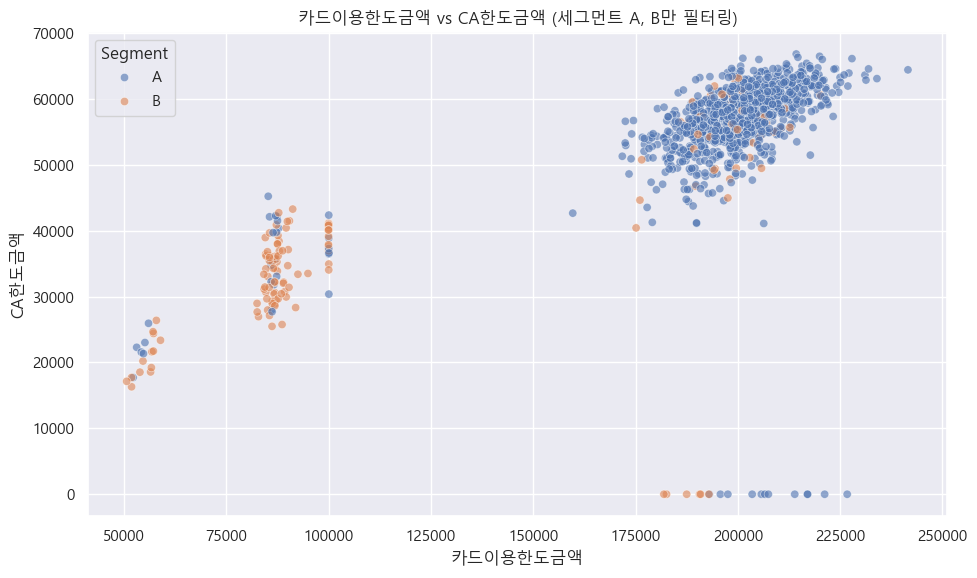

In [77]:
# A와 B 세그먼트만 필터링
ab_df = credit_df_with_segment[credit_df_with_segment['Segment'].isin(['A', 'B'])]

# 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=ab_df,
    x='카드이용한도금액',
    y='CA한도금액',
    hue='Segment',
    alpha=0.6
)
plt.title("카드이용한도금액 vs CA한도금액 (세그먼트 A, B만 필터링)")
plt.xlabel("카드이용한도금액")
plt.ylabel("CA한도금액")
plt.legend(title="Segment")
plt.tight_layout()
plt.show()

### 세그먼트 A, B 간 카드한도 및 CA한도금액 분포 차이

- **세그먼트 A**는 카드이용한도 및 CA한도금액 모두 높은 값을 가지며, 고한도 고객이 주를 이룸.
- **세그먼트 B**는 전반적으로 한도가 낮으며, 일부 중간 값 구간에도 분포하나 대체로 낮은 쪽에 집중됨.
- 시각화 결과로 보아, **A는 우량 고객**, **B는 신규 또는 신용도가 낮은 고객**일 가능성이 있으며,
  이는 세그먼트 분류에서 중요한 기준점이 될 수 있음.
- 이후 분석에서는 다른 한도 관련 변수들과의 조합이나, 연체율 등과 교차 비교하여
  실제 리스크 요인으로 작용하는지를 살펴볼 필요가 있음.

In [79]:
credit_df_with_segment['Segment'].value_counts()

Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64

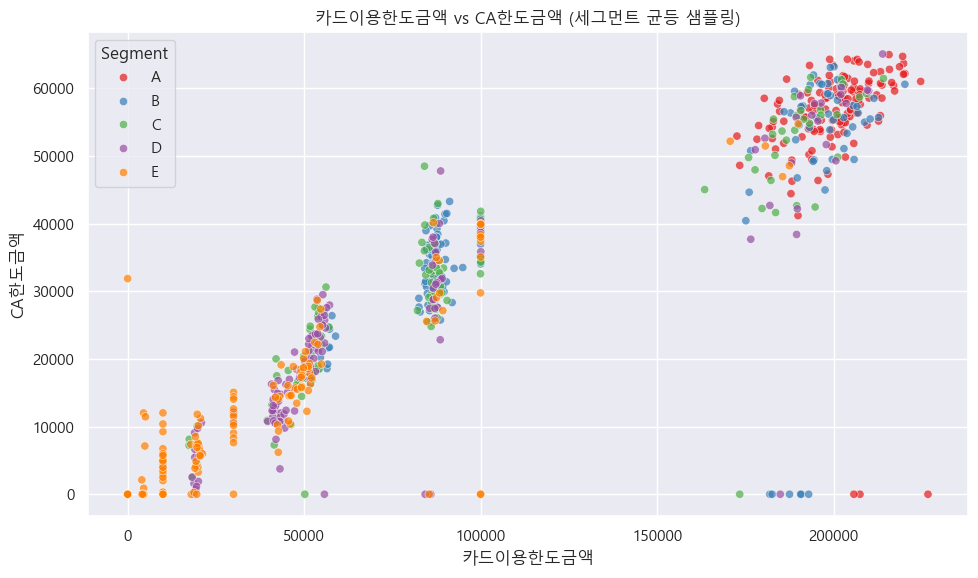

In [80]:
# 샘플 수 기준 (가장 적은 세그먼트인 B 기준)
sample_n = credit_df_with_segment['Segment'].value_counts().min()

# 세그먼트별 동일 개수만큼 샘플링
balanced_sample = (
    credit_df_with_segment
    .groupby('Segment', group_keys=False)
    .apply(lambda x: x.sample(n=sample_n, random_state=42))
)

# 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=balanced_sample,
    x='카드이용한도금액',
    y='CA한도금액',
    hue='Segment',
    palette='Set1',
    alpha=0.7
)
plt.title("카드이용한도금액 vs CA한도금액 (세그먼트 균등 샘플링)")
plt.xlabel("카드이용한도금액")
plt.ylabel("CA한도금액")
plt.legend(title="Segment")
plt.tight_layout()
plt.show()

## 세그먼트별 카드이용한도금액 vs CA한도금액 분포 (균등 샘플링 기반 분석)

### ✅ 분석 개요
- 원본 데이터에서는 Segment E의 비중이 지나치게 높아 다른 세그먼트와의 공정한 비교가 어려웠음.
- 이를 보완하기 위해 **모든 세그먼트에서 동일한 개수(N=144)**를 랜덤 샘플링하여 시각화함.
- 변수:
  - **X축**: 카드이용한도금액
  - **Y축**: CA한도금액
  - **색상**: Segment 구분

---

### 📊 주요 해석

1. **고한도 그룹 (카드이용한도금액 ≥ 170,000)**  
   - 대부분 **Segment A와 B**에 집중되어 있음.  
   - 해당 고객은 고한도·고신용 우수 고객일 가능성이 높음.

2. **중하위 그룹 (카드이용한도금액 ≤ 100,000)**  
   - **Segment C, D, E**가 고르게 분포함.  
   - 특히 **Segment E는 저한도 구간 (0 ~ 50,000)**에 주로 위치.

3. **CA한도금액과의 관계**  
   - 두 변수 간 대체로 **선형 비례 관계**를 보임.  
   - 특정 금액 구간(예: 50,000 / 100,000)에서 군집 형성 → 제도적 한도 설정값의 영향 추정.

4. **균등 샘플링의 효과**  
   - 과소표집되었던 A, B 그룹의 분포가 명확하게 드러남.  
   - 세그먼트 간 한도 설정 패턴 비교가 훨씬 용이해짐.

---

### 🔍 다음 분석 방향 제안

- **Segment A, B** 고한도 그룹의 특성 분석
  - 이자율, 최소결제비율, 연체이력 등과의 상관성 추가 분석
- **Segment E** 세분화
  - 저한도군 내에서도 리볼빙 이력 또는 약정청구율에 따라 추가 그룹 가능성 탐색
- **비지도학습 (군집 분석)** 적용
  - 시각적 군집이 존재하므로 KMeans, DBSCAN 등을 통해 기존 세그먼트 이외의 패턴을 탐색



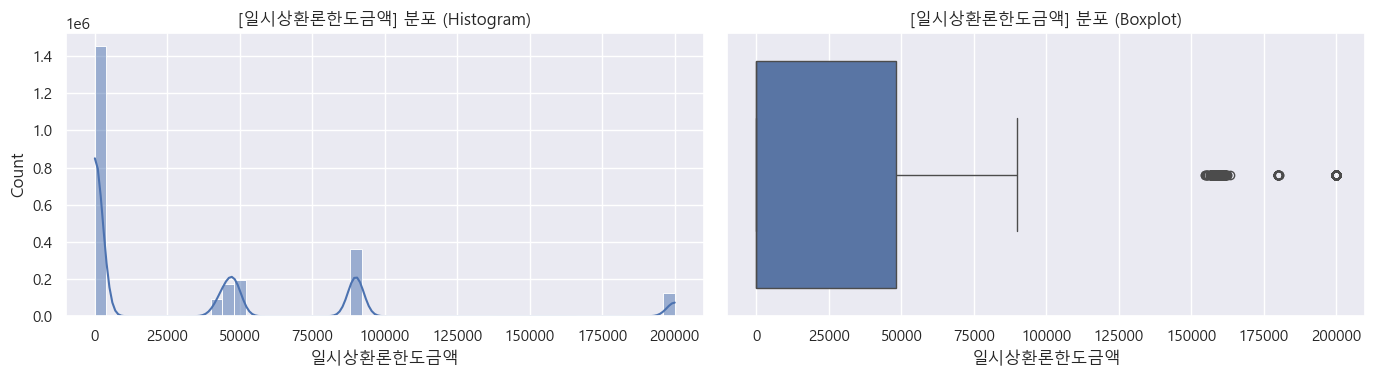

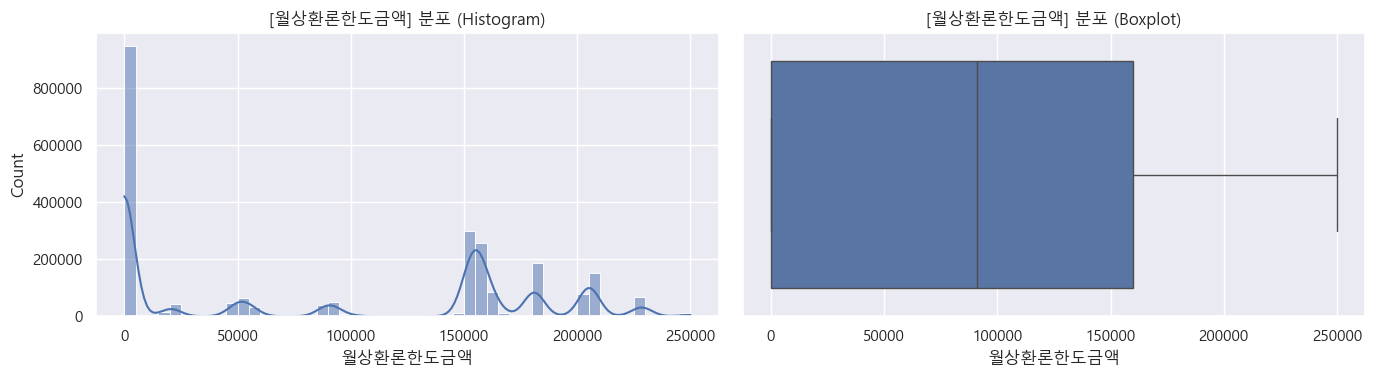

In [82]:
# 분석 대상 컬럼
loan_limit_cols = ['일시상환론한도금액', '월상환론한도금액']

# 시각화 함수
def plot_loan_limit_distribution(df, col):
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # 히스토그램
    sns.histplot(data=df, x=col, bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f"[{col}] 분포 (Histogram)")
    
    # 박스플롯
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f"[{col}] 분포 (Boxplot)")
    
    plt.tight_layout()
    plt.show()

# 시각화 실행
for col in loan_limit_cols:
    plot_loan_limit_distribution(credit_df_with_segment, col)

In [83]:
# 세그먼트별 평균 계산
segment_means = credit_df_with_segment.groupby("Segment")[loan_limit_cols].mean()
display(segment_means)

,일시상환론한도금액,월상환론한도금액
Segment,,
A,52293.35,102743.08
B,33333.92,65634.95
C,48676.32,103010.22
D,39583.25,99627.25
E,30731.54,89670.87


### 💳 일시상환론한도금액 & 월상환론한도금액 분석

#### ✅ 분석 배경
`일시상환론한도금액`과 `월상환론한도금액`은 고객의 한도 특성을 보여주는 주요 변수입니다.  
앞서 분석한 결과에서 A, B 세그먼트는 고한도 특성이 강하고, E 세그먼트는 저한도 특성이 뚜렷했습니다.  
이에 따라 이 두 변수 또한 세그먼트 분류에 유의미한지 확인하고자 평균값을 비교해 보았습니다.

#### ✅ 세그먼트별 평균값

| Segment | 일시상환론한도금액 | 월상환론한도금액 |
|---------|---------------------|-------------------|
| A       | 52,293.35           | 102,743.08        |
| B       | 33,333.92           | 65,634.95         |
| C       | 48,676.32           | 103,010.22        |
| D       | 39,583.25           | 99,627.25         |
| E       | 30,731.54           | 89,670.87         |

#### ✅ 해석

- `일시상환론한도금액`은 A 세그먼트에서 가장 높으며, E 세그먼트에서 가장 낮습니다.
- `월상환론한도금액` 또한 A와 C 세그먼트가 높은 반면, E 세그먼트는 가장 낮은 평균을 보입니다.
- 특히 A 세그먼트는 두 한도에서 모두 평균이 가장 높아, **고한도 특성이 명확하게 드러납니다.**
- 반대로 E 세그먼트는 전반적으로 **낮은 한도를 보이는 저한도군**으로 분류할 수 있습니다.

#### ✅ 결론 및 활용 방안

- 이 두 변수는 세그먼트를 구분하는 데 있어 유용한 특성이며,
- 특히 A와 E의 구분에 효과적으로 활용될 수 있습니다.
- 이후 예측 모델에서 중요한 피처로 포함하는 것을 고려할 수 있습니다.


### 최초한도금액

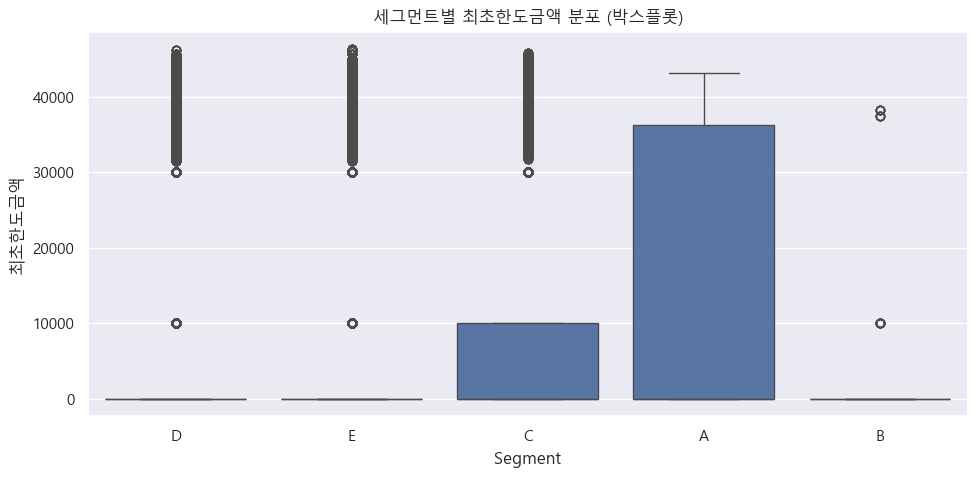

In [86]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=credit_df_with_segment, x="Segment", y="최초한도금액")
plt.title("세그먼트별 최초한도금액 분포 (박스플롯)")
plt.tight_layout()
plt.show()

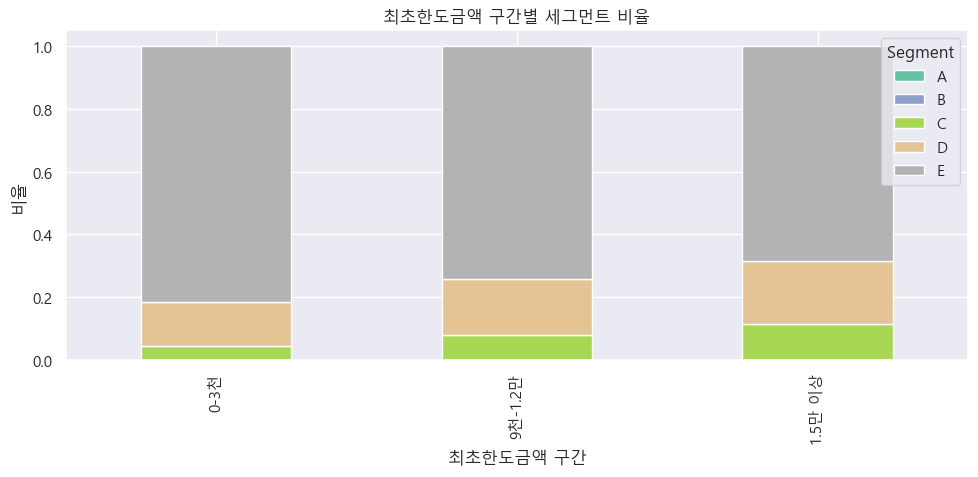

In [87]:
# 금액 구간 설정 (예시: 0~3000, 3000~6000, ..., 15000 이상)
bins = [0, 3000, 6000, 9000, 12000, 15000, credit_df_with_segment["최초한도금액"].max()]
labels = ['0-3천', '3천-6천', '6천-9천', '9천-1.2만', '1.2만-1.5만', '1.5만 이상']

credit_df_with_segment["최초한도금액_구간"] = pd.cut(
    credit_df_with_segment["최초한도금액"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# 교차표 생성 (비율 기준)
amount_segment_ratio = pd.crosstab(
    credit_df_with_segment["최초한도금액_구간"],
    credit_df_with_segment["Segment"],
    normalize='index'
)

# 시각화
amount_segment_ratio.plot(kind="bar", stacked=True, figsize=(10, 5), colormap='Set2')
plt.title("최초한도금액 구간별 세그먼트 비율")
plt.ylabel("비율")
plt.xlabel("최초한도금액 구간")
plt.legend(title="Segment")
plt.tight_layout()
plt.show()

### 🔍 최초한도금액 구간별 세그먼트 분포 분석

#### ✅ 관찰 결과
- 시각화 결과, `최초한도금액` 구간이 증가함에 따라 세그먼트 E의 비중이 줄고, C와 A의 비중은 조금씩 증가하는 모습을 보임.
- 그러나 전체적으로 보면 **세그먼트 간 분포 차이가 크지 않으며**, 경계가 뚜렷하지 않음.

#### ✅ 삭제 여부 판단 기준
- 단순히 시각적으로 "차이가 뚜렷하지 않다"고 해서 바로 컬럼을 삭제하긴 어렵습니다.
- 아래의 경우에는 컬럼 삭제를 고려할 수 있음:

  1. **세그먼트 예측 모델에서 중요도가 매우 낮게 나오는 경우**
  2. **다른 한도 관련 변수들과 강한 상관관계(다중공선성)**가 있는 경우
  3. **해당 컬럼의 값이 거의 동일하거나, 정보량(분산)이 매우 적은 경우**

#### ✅ 추천 방향
- 지금 단계에서는 **삭제하지 말고**, 추후 모델링 단계에서 `feature importance` 또는 `VIF(Variance Inflation Factor)` 같은 수치를 통해 영향력을 분석한 뒤 삭제 여부를 결정하는 것이 더 적절합니다.


## ✅ 한도심사요청건수 변수 보존 고려 근거

### 🔍 기존 판단
- 전체 고객의 **99.9% 이상이 "0회"**로, 대부분 한도심사를 요청하지 않음
- 따라서 처음에는 분포의 쏠림과 의미 있는 구분 부족으로 제거를 고려

### 🔄 그러나 다시 살펴보면...
- 세그먼트 A와 B는 전체적으로 **높은 한도**, **높은 이자율**, **약정비율이 높은 리볼빙 사용 등**의 특성을 가짐
- 이는 **신용 위험이 높거나** 또는 **카드 사용에 있어 적극적인 성향**으로 해석 가능
- `한도심사요청건수`는 바로 이러한 **고위험 또는 적극 활용군의 "능동적 행동"**을 반영하는 지표일 수 있음

### 📈 변수의 역할 재해석
- 비록 대부분이 0회라 하더라도, **1회 이상인 고객군이 A 또는 B에 집중되어 있다면**, 이는 훌륭한 예측 변수로 사용 가능
- 특히 **A, B와 그 외 세그먼트를 구분하는 이진 분류 모델에서 상관성이 클 가능성** 존재

> ✅ 결론: `한도심사요청건수`는 단독 변수로는 미약하지만, **A/B군 탐지에 있어 보조 변수로 의미가 있을 수 있으므로 보존**하는 것이 타당


In [90]:
credit_df_with_segment['한도심사요청건수'].value_counts()

한도심사요청건수
0회      2399913
1회이상         87
Name: count, dtype: int64

In [91]:
# 1. 1회 이상 필터링 (0회가 아닌 경우)
over1_df = credit_df_with_segment[credit_df_with_segment["한도심사요청건수"] != "0회"]

# 2. Segment별 개수 및 비율 확인
segment_counts = over1_df["Segment"].value_counts()
segment_ratio = over1_df["Segment"].value_counts(normalize=True) * 100

# 3. 결과 출력
print("📊 1회 이상 한도심사요청 고객 수:")
display(segment_counts)

print("\n📊 1회 이상 한도심사요청 고객의 세그먼트 비율 (%):")
display(segment_ratio)

📊 1회 이상 한도심사요청 고객 수:


Segment
E    61
D    15
C    11
Name: count, dtype: int64


📊 1회 이상 한도심사요청 고객의 세그먼트 비율 (%):


Segment
E   70.11
D   17.24
C   12.64
Name: proportion, dtype: float64

### 🔍 한도심사요청건수(1회 이상) 고객의 세그먼트 분포 분석 결과

- **1회 이상 한도심사요청을 한 고객 수**는 총 87명으로 전체(2,400,000건) 중 **극소수**에 해당함.
- 이 중 세그먼트 분포는 다음과 같음:
  - **E 세그먼트**: 70.11%
  - **D 세그먼트**: 17.24%
  - **C 세그먼트**: 12.64%
- **A와 B 세그먼트는 단 한 건도 없음**.

### 📌 해석 및 결론

- 세그먼트 간 차이가 있다고 보기 어렵고, **전체 분포와 유사하거나, 그보다 더 E에 치우친 결과**를 보임.
- 따라서 이 변수는 세그먼트 예측에 **유의미한 영향을 주지 못하며**, 
  **삭제 대상 후보 변수로 간주**해도 무방함.


In [228]:
credit_df_with_segment['한도요청거절건수'].value_counts()

한도요청거절건수
0    2399939
1         61
Name: count, dtype: int64

In [230]:
# 1. 1회 이상 필터링 (0회가 아닌 경우)
over1_df = credit_df_with_segment[credit_df_with_segment["한도요청거절건수"] != "0회"]

# 2. Segment별 개수 및 비율 확인
segment_counts = over1_df["Segment"].value_counts()
segment_ratio = over1_df["Segment"].value_counts(normalize=True) * 100

# 3. 결과 출력
print("📊 1회 이상 한도심사요청거절 고객 수:")
display(segment_counts)

print("\n📊 1회 이상 한도심사요청거절 고객의 세그먼트 비율 (%):")
display(segment_ratio)

📊 1회 이상 한도심사요청거절 고객 수:


Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64


📊 1회 이상 한도심사요청거절 고객의 세그먼트 비율 (%):


Segment
E   80.09
D   14.55
C    5.32
A    0.04
B    0.01
Name: proportion, dtype: float64

In [93]:
credit_df_with_segment['특별한도보유여부_R3M'].value_counts()

특별한도보유여부_R3M
0    2399877
1        123
Name: count, dtype: int64

In [94]:
# 1. 1회 이상 보유한 고객 필터링
special_limit_df = credit_df_with_segment[credit_df_with_segment["특별한도보유여부_R3M"] != "0회"]

# 2. 세그먼트별 도수 계산
segment_count = special_limit_df["Segment"].value_counts()
print("📊 1회 이상 특별한도 보유 고객 수:")
display(segment_count)

# 3. 세그먼트별 비율 계산 (%)
segment_ratio = segment_count / segment_count.sum() * 100
print("📊 1회 이상 특별한도 보유 고객의 세그먼트 비율 (%):")
display(segment_ratio)

# 4. A, B 세그먼트 합산 비율
ab_ratio = segment_ratio.get("A", 0) + segment_ratio.get("B", 0)
print(f"✅ A와 B 세그먼트가 차지하는 비율: {ab_ratio:.2f}%")

📊 1회 이상 특별한도 보유 고객 수:


Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64

📊 1회 이상 특별한도 보유 고객의 세그먼트 비율 (%):


Segment
E   80.09
D   14.55
C    5.32
A    0.04
B    0.01
Name: count, dtype: float64

✅ A와 B 세그먼트가 차지하는 비율: 0.05%


In [95]:
credit_df_with_segment['연체감액여부_R3M'].value_counts()

연체감액여부_R3M
0    2383336
1      16664
Name: count, dtype: int64

In [96]:
# 1. '1회 이상'인 고객만 필터링
overdue_reduction_df = credit_df_with_segment[credit_df_with_segment["연체감액여부_R3M"] != "0회"]

# 2. 세그먼트별 도수 분포 계산
segment_count = overdue_reduction_df["Segment"].value_counts()
print("📊 1회 이상 연체감액 고객 수:")
display(segment_count)

# 3. 세그먼트별 비율 계산 (%)
segment_ratio = segment_count / segment_count.sum() * 100
print("📊 1회 이상 연체감액 고객의 세그먼트 비율 (%):")
display(segment_ratio)

# 4. A, B 세그먼트 비율 합산
ab_ratio = segment_ratio.get("A", 0) + segment_ratio.get("B", 0)
print(f"✅ A와 B 세그먼트가 차지하는 비율: {ab_ratio:.2f}%")

📊 1회 이상 연체감액 고객 수:


Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64

📊 1회 이상 연체감액 고객의 세그먼트 비율 (%):


Segment
E   80.09
D   14.55
C    5.32
A    0.04
B    0.01
Name: count, dtype: float64

✅ A와 B 세그먼트가 차지하는 비율: 0.05%


### 특별한도보유여부_R3M와 연체감액여부_R3M 결과
- 1회 이상이 현저히 적은 도수를 보유하고 있기 때문에 수치적으로 세그먼트와의 관계에서 0에 가까운 수치를 보였지만, 데이터를 뜯어보니, A와 B의 합산 비율이 약 5%로 우선 사용하기로 했으나, 추후 모델링 과정에서 VIF 문제가 발생한다면 삭제할 예정이다.


In [98]:
credit_df_with_segment['월상환론상향가능한도금액'].value_counts()

월상환론상향가능한도금액
0     2028963
18     316637
16      40237
4        9771
15       3517
19        397
12        273
24        166
13         20
17         10
5           4
2           3
23          1
10          1
Name: count, dtype: int64

In [99]:
# 세그먼트별 '월상환론상향가능한도금액' 평균 계산
monthly_limit_mean = credit_df_with_segment.groupby("Segment")["월상환론상향가능한도금액"].mean().sort_values(ascending=False)

# 결과 출력
print("📊 세그먼트별 월상환론상향가능한도금액 평균:")
display(monthly_limit_mean)

📊 세그먼트별 월상환론상향가능한도금액 평균:


Segment
D   2.82
A   2.81
E   2.70
C   2.13
B   0.75
Name: 월상환론상향가능한도금액, dtype: float64

## 📊 월상환론상향가능한도금액과 세그먼트 간의 관계 해석

| Segment | 월상환론상향가능한도금액 평균 |
|---------|-------------------------------|
| D       | 2.82                          |
| A       | 2.81                          |
| E       | 2.70                          |
| C       | 2.13                          |
| B       | 0.75                          |

- Segment **B**는 다른 세그먼트에 비해 **월상환론상향가능한도금액이 현저히 낮은** 특징을 보임.
- 반면 A, D, E는 평균값이 2.7 이상으로 유사한 분포를 보이며, 상대적으로 상향 가능 금액이 크다는 점에서 **여신 여력**이 더 있는 고객일 가능성이 있음.
- C는 중간값 수준이며, B와의 차이가 다소 뚜렷함.

### ✅ 분석 방향 제안
- **Segment B**를 구분 짓는 데 있어 `월상환론상향가능한도금액`은 **잠재적인 주요 변수**로 활용 가능.
- 다른 세그먼트 간의 분포가 유사하므로, **Segment B vs Others** 형태로 이진 분류 또는 군집 중심의 보조 변수로 활용하기 적합.
- 이후 다른 변수들과 함께 결합하여 **다변량 분석 혹은 feature importance 평가**에서 그 유의미성을 검토해볼 것.


In [101]:
credit_df_with_segment['자발한도감액후경과월'].value_counts()

자발한도감액후경과월
12    2399579
0         284
1          90
2          31
3          11
11          3
4           2
Name: count, dtype: int64

In [102]:
# 세그먼트별 '자발한도감액후경과월' 평균 계산
self_limit_mean = credit_df_with_segment.groupby("Segment")["자발한도감액후경과월"].mean().sort_values(ascending=False)

# 결과 출력
print("📊 세그먼트별 자발한도감액후경과월 평균:")
display(self_limit_mean)

📊 세그먼트별 자발한도감액후경과월 평균:


Segment
A   12.00
B   12.00
E   12.00
C   12.00
D   12.00
Name: 자발한도감액후경과월, dtype: float64

In [216]:
credit_df_with_segment['강제한도감액금액_R12M'].value_counts()

강제한도감액금액_R12M
0    2081622
1     184707
2     114311
6      18386
4        822
7        149
9          3
Name: count, dtype: int64

In [218]:
# 세그먼트별 '강제한도감액금액_R12M' 평균 계산
Nself_money_mean = credit_df_with_segment.groupby("Segment")["강제한도감액금액_R12M"].mean().sort_values(ascending=False)

# 결과 출력
print("📊 세그먼트별 강제한도감액금액_R12M 평균:")
display(Nself_money_mean)

📊 세그먼트별 강제한도감액금액_R12M 평균:


Segment
A   0.26
E   0.24
B   0.19
C   0.18
D   0.15
Name: 강제한도감액금액_R12M, dtype: float64

In [208]:
credit_df_with_segment['강제한도감액후경과월'].value_counts()

강제한도감액후경과월
12    2132095
9       32928
10      32370
11      31922
1       29968
0       25374
2       25276
3       21235
8       18697
4       18289
5       15877
6       13527
7        2442
Name: count, dtype: int64

In [210]:
# 세그먼트별 '자발한도감액후경과월' 평균 계산
Nself_limit_mean = credit_df_with_segment.groupby("Segment")["강제한도감액후경과월"].mean().sort_values(ascending=False)

# 결과 출력
print("📊 세그먼트별 강제한도감액후경과월 평균:")
display(self_limit_mean)

📊 세그먼트별 강제한도감액후경과월 평균:


Segment
A   12.00
B   12.00
E   12.00
C   12.00
D   12.00
Name: 자발한도감액후경과월, dtype: float64

In [220]:
credit_df_with_segment['한도증액횟수_R12M'].value_counts()

한도증액횟수_R12M
0회      2116131
1회이상     283869
Name: count, dtype: int64

In [222]:
# 1. '1회 이상'인 고객만 필터링
overdue_reduction_df = credit_df_with_segment[credit_df_with_segment["한도증액횟수_R12M"] != "0회"]

# 2. 세그먼트별 도수 분포 계산
segment_count = overdue_reduction_df["Segment"].value_counts()
print("📊 1회 이상 한도증액 고객 수:")
display(segment_count)

# 3. 세그먼트별 비율 계산 (%)
segment_ratio = segment_count / segment_count.sum() * 100
print("📊 1회 이상 한도증액 고객의 세그먼트 비율 (%):")
display(segment_ratio)

# 4. A, B 세그먼트 비율 합산
ab_ratio = segment_ratio.get("A", 0) + segment_ratio.get("B", 0)
print(f"✅ A와 B 세그먼트가 차지하는 비율: {ab_ratio:.2f}%")

📊 1회 이상 한도증액 고객 수:


Segment
E    205879
D     58542
C     19245
A       175
B        28
Name: count, dtype: int64

📊 1회 이상 한도증액 고객의 세그먼트 비율 (%):


Segment
E   72.53
D   20.62
C    6.78
A    0.06
B    0.01
Name: count, dtype: float64

✅ A와 B 세그먼트가 차지하는 비율: 0.07%


In [212]:
credit_df_with_segment['강제한도감액횟수_R12M'].value_counts()

강제한도감액횟수_R12M
0    2047670
1     335845
4       7296
3       4866
2       4323
Name: count, dtype: int64

In [214]:
# 세그먼트별 '자발한도감액후경과월' 평균 계산
Nself_day_mean = credit_df_with_segment.groupby("Segment")["강제한도감액횟수_R12M"].mean().sort_values(ascending=False)

# 결과 출력
print("📊 세그먼트별 강제한도감액횟수_R12M 평균:")
display(Nself_day_mean)

📊 세그먼트별 강제한도감액횟수_R12M 평균:


Segment
A   0.24
B   0.22
C   0.17
E   0.16
D   0.15
Name: 강제한도감액횟수_R12M, dtype: float64

In [232]:
credit_df_with_segment['한도심사요청후경과월'].value_counts()

한도심사요청후경과월
3    2399928
1         47
2         24
0          1
Name: count, dtype: int64

In [234]:
# 세그먼트별 '한도심사요청후경과월' 평균 계산
Nself_day_mean = credit_df_with_segment.groupby("Segment")["한도심사요청후경과월"].mean().sort_values(ascending=False)

# 결과 출력
print("📊 세그먼트별 한도심사요청후경과월 평균:")
display(Nself_day_mean)

📊 세그먼트별 한도심사요청후경과월 평균:


Segment
A   3.00
B   3.00
E   3.00
D   3.00
C   3.00
Name: 한도심사요청후경과월, dtype: float64

In [103]:
credit_df_with_segment['자발한도감액금액_R12M'].value_counts()

자발한도감액금액_R12M
0    2397483
1       2401
2        116
Name: count, dtype: int64

In [104]:
# 세그먼트별 '자발한도감액금액_R12M' 평균 계산
bill_limit_mean = credit_df_with_segment.groupby("Segment")["자발한도감액금액_R12M"].mean().sort_values(ascending=False)

# 결과 출력
print("📊 세그먼트별 자발한도감액금액_R12M 평균:")
display(bill_limit_mean)

📊 세그먼트별 자발한도감액금액_R12M 평균:


Segment
C   0.00
D   0.00
E   0.00
A   0.00
B   0.00
Name: 자발한도감액금액_R12M, dtype: float64

In [236]:
credit_df_with_segment['한도심사거절후경과월'].value_counts()

한도심사거절후경과월
3    2399944
1         36
2         18
0          2
Name: count, dtype: int64

In [238]:
# 세그먼트별 '한도심사거절후경과월' 평균 계산
bill_limit_mean = credit_df_with_segment.groupby("Segment")["한도심사거절후경과월"].mean().sort_values(ascending=False)

# 결과 출력
print("📊 세그먼트별 한도심사거절후경과월 평균:")
display(bill_limit_mean)

📊 세그먼트별 한도심사거절후경과월 평균:


Segment
A   3.00
B   3.00
E   3.00
D   3.00
C   3.00
Name: 한도심사거절후경과월, dtype: float64

In [105]:
credit_df_with_segment['일시불ONLY전환가능여부'].value_counts()

일시불ONLY전환가능여부
1    1958616
0     441384
Name: count, dtype: int64

In [106]:
# 세그먼트별 '일시불ONLY전환가능여부' 평균 계산
change_mean = credit_df_with_segment.groupby("Segment")["일시불ONLY전환가능여부"].mean().sort_values(ascending=False)

# 결과 출력
print("📊 세그먼트별 일시불ONLY전환가능여부 평균:")
display(change_mean)

📊 세그먼트별 일시불ONLY전환가능여부 평균:


Segment
A   0.84
E   0.82
D   0.81
C   0.78
B   0.49
Name: 일시불ONLY전환가능여부, dtype: float64

In [107]:
credit_df_with_segment['상향가능CA한도금액'].value_counts()

상향가능CA한도금액
0    1048107
1     705910
2     505880
3     138904
4       1199
Name: count, dtype: int64

In [108]:
# 세그먼트별 '상향가능CA한도금액' 평균 계산
CA_limit_mean = credit_df_with_segment.groupby("Segment")["상향가능CA한도금액"].mean().sort_values(ascending=False)

# 결과 출력
print("📊 세그먼트별 상향가능CA한도금액 평균:")
display(CA_limit_mean)

📊 세그먼트별 상향가능CA한도금액 평균:


Segment
D   1.02
C   1.02
B   1.00
A   0.92
E   0.86
Name: 상향가능CA한도금액, dtype: float64

## 📊 상향가능CA한도금액과 세그먼트 간 관계 해석

- Segment **D, C**가 평균 1.02로 가장 높은 반면, **Segment E**는 0.86로 가장 낮음.
- Segment **A**와 **B**는 중간값 수준이며, E와는 **0.14~0.16 차이**를 보임.
- 평균값의 차이가 **아주 크진 않지만, 분명한 경향성은 있음**:
  - **세그먼트가 높을수록 (A, B, C, D) CA 한도 상향 가능성도 높게 나타나는 경향**.
  - **Segment E는 상대적으로 보수적 관리 대상**일 가능성 존재.

### ✅ 분석 방향 제안
- 단일 변수만으로 세그먼트를 구분하긴 어려우나,
- **Segment E를 다른 세그먼트와 구분하는 보조 변수로서 유의미**할 수 있음.
- 따라서 해당 변수는 **삭제보다는 보존**하고, 이후 다변량 분석이나 feature selection 과정에서 **영향력을 평가**해보는 것이 좋음.


In [110]:
credit_df_with_segment['상향가능한도금액'].value_counts()

상향가능한도금액
0     1008987
4      264408
5      222654
6      192874
3      190772
7      165521
8      130435
9       93049
10      59551
11      32566
2       15595
12      14794
13       5832
14       2065
15        634
16        200
17         44
18         19
Name: count, dtype: int64

In [111]:
# 세그먼트별 '상향가능한도금액' 평균 계산
money_limit_mean = credit_df_with_segment.groupby("Segment")["상향가능한도금액"].mean().sort_values(ascending=False)

# 결과 출력
print("📊 세그먼트별 상향가능한도금액 평균:")
display(money_limit_mean)

📊 세그먼트별 상향가능한도금액 평균:


Segment
D   3.87
C   3.71
B   3.60
A   3.34
E   3.33
Name: 상향가능한도금액, dtype: float64

## 📊 상향가능한도금액과 세그먼트 간 관계 해석

- 전체 세그먼트 간 평균값 차이가 크지 않음:
  - 가장 높은 Segment D (3.87)와 가장 낮은 Segment E (3.33) 간 차이도 약 **0.54 수준**.
  - Segment A, B, C도 거의 유사한 수준의 평균을 보임.
- 시각화 없이도 확인되는 바, **세그먼트를 명확히 구분하기에는 구분도가 낮은 변수**임.

### ✅ 분석 방향 제안
- 현재 단계에서는 **세그먼트 분류에 크게 기여하지 않을 가능성**이 있음.
- 따라서:
  - **우선순위에서 낮게 고려하거나**
  - **후속 분석 (예: 중요도 기반 feature selection, 모델링 후 permutation importance 등)에서 영향도가 낮다면 제거를 검토**해도 무방함.


In [113]:
credit_df_with_segment['한도증액금액_R12M'].value_counts()

한도증액금액_R12M
0    2129144
1     249886
2      20956
3         14
Name: count, dtype: int64

In [114]:
# 세그먼트별 '한도증액금액_R12M' 평균 계산
money_up_mean = credit_df_with_segment.groupby("Segment")["한도증액금액_R12M"].mean().sort_values(ascending=False)

# 결과 출력
print("📊 세그먼트별 한도증액금액_R12M 평균:")
display(money_up_mean)

📊 세그먼트별 한도증액금액_R12M 평균:


Segment
A   0.32
B   0.27
C   0.19
D   0.18
E   0.11
Name: 한도증액금액_R12M, dtype: float64

In [115]:
# 평균을 구할 컬럼 리스트
cols = ['강제한도감액횟수_R12M', '강제한도감액금액_R12M', '강제한도감액후경과월']

# Segment별 평균 계산
segment_means = credit_df_with_segment.groupby('Segment')[cols].mean().round(2)

# 결과 출력
print("📊 세그먼트별 강제한도감액 관련 컬럼 평균:")
display(segment_means)


📊 세그먼트별 강제한도감액 관련 컬럼 평균:


,강제한도감액횟수_R12M,강제한도감액금액_R12M,강제한도감액후경과월
Segment,,,
A,0.24,0.26,11.53
B,0.22,0.19,11.26
C,0.17,0.18,11.53
D,0.15,0.15,11.52
E,0.16,0.24,11.24


In [116]:
credit_df_with_segment['CA이자율_할인전'].value_counts()

CA이자율_할인전
14.22    240003
23.00     33833
14.22        12
14.22        11
14.22        11
          ...  
14.66         1
17.00         1
21.98         1
14.63         1
14.84         1
Name: count, Length: 1882014, dtype: int64

In [117]:
credit_df_with_segment['CL이자율_할인전'].value_counts()

CL이자율_할인전
23.00    47590
10.90       10
10.90        9
10.90        9
10.90        9
         ...  
15.30        1
14.87        1
15.66        1
18.02        1
15.29        1
Name: count, Length: 2126771, dtype: int64

In [118]:
# 분석할 이자율 컬럼 리스트
rate = ['CA이자율_할인전', 'CL이자율_할인전']

# 세그먼트별 평균 계산
rate_mean = credit_df_with_segment.groupby("Segment")[rate].mean().T

# 보기 좋게 포맷팅
pd.options.display.float_format = '{:.2f}'.format
display(rate_mean)

Segment,A,B,C,D,E
CA이자율_할인전,16.87,18.70,16.69,16.23,15.69
CL이자율_할인전,15.17,16.34,15.04,14.92,14.70


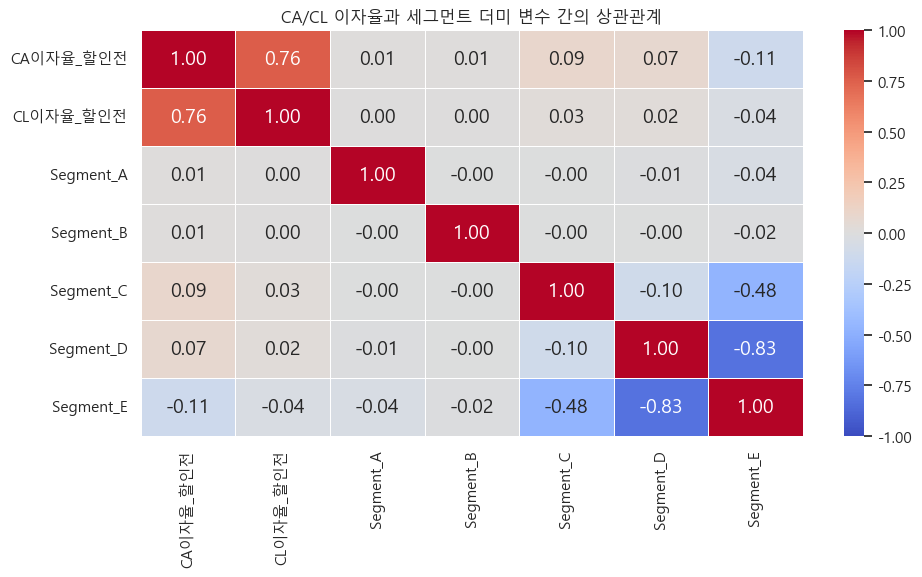

In [119]:
# Segment 인코딩
df_corr = credit_df_with_segment.copy()
segment_dummies = pd.get_dummies(df_corr['Segment'], prefix='Segment')
df_corr = pd.concat([df_corr, segment_dummies], axis=1)

# 관심 변수 선택
cols_of_interest = ['CA이자율_할인전', 'CL이자율_할인전'] + list(segment_dummies.columns)
corr_matrix = df_corr[cols_of_interest].corr()

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmax=1, vmin=-1)
plt.title('CA/CL 이자율과 세그먼트 더미 변수 간의 상관관계')
plt.tight_layout()
plt.show()

## CA이자율_할인전 vs CL이자율_할인전: 변수 선택 고려

- 세그먼트 더미 변수와의 상관관계를 살펴본 결과, `CA이자율_할인전`이 특히 Segment E와 더 높은 상관을 보임.
- `CA이자율_할인전`과 `CL이자율_할인전`은 유사한 금융 속성을 가지므로, **다중공선성 문제**가 생길 수 있음.
- 추후 모델링 시 두 변수 중 **하나만 선택해야 하는 상황이 온다면**, 
  - 세그먼트 구분력이 더 높은 **`CA이자율_할인전`** 을 우선 고려하는 것이 더 타당.
- 단, 모델 성능과 변수 중요도는 **모델 훈련 단계에서 교차검증 또는 feature importance**를 통해 최종 판단하는 것이 좋음.
